# Plot the retrieved motifs

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import os
from os.path import isfile, join
from itertools import compress
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.backends.backend_pdf
from scipy.stats import nbinom

### helper functions

In [3]:
def generate_kmer_inx():
    vals = {'A':0,'C':1,'G':2,'T':3}
    l = 3 #core length
    kmer_inx = {}
    for p in list(itertools.product(vals.keys(), repeat=l)):
        inx = 0
        for j,base in enumerate(p):
            inx += (4**j)*vals[base] 
        kmer_inx[''.join(p)] = inx
    return kmer_inx

#assignes each kmer to an index and visa versa
kmer_inx = generate_kmer_inx()
inx_kmer = {y:x for x,y in kmer_inx.items()}

In [4]:
#reads the np.array files and extract the parameters
#the distance parameters (last 3) are exp'ed to stay positive
def read_params(files):
    n_additional = 3 #non parameters saved at the end
    n_exped = 3 #parameters kept positive through log exp trick
    params = []
    for f in files:
        param = np.loadtxt(join(param_dir, f))
        param[-n_additional-n_exped:-n_additional] = np.exp(param[-n_additional-n_exped:-n_additional])
        param[-n_additional-1] = param[-n_additional-1]/(1+param[-n_additional-1])
        params.append(param)      
    return params

### read files

In [137]:
param_dir = 'param/selex/'

keyw = 'TAF15_cycle4.seq_vs_cycle0.seq'  #the keyword which assigns the files to a batch

if True:
    n_orig = 40
    p_orig = 0.8
    distance_enrichment = np.loadtxt('data/motif_enrichment_by_distance.txt')

param_files = [f for f in os.listdir(param_dir) if isfile(join(param_dir, f))]

to_pick = [s.startswith(keyw) for s in param_files]
param_files = list(compress(param_files, to_pick))

In [138]:
print('number of files: %d'%len(param_files))
adam_params = read_params(param_files)

number of files: 6


### plotting

In [144]:
#structure data as pandas DF
colnames = [inx_kmer[i] for i in range(len(inx_kmer))] + [inx_kmer[i] for i in range(len(inx_kmer))] + ['sf', 'r', 'p'] + ['LL', 'auct', 'aucv']

data = pd.DataFrame(adam_params, columns=colnames)
core1 = data.iloc[:,:len(kmer_inx)]
core1 = core1.loc[:,core1.median().sort_values().index]
core2 = data.iloc[:,len(kmer_inx):2*len(kmer_inx)]
core2 = core2.loc[:,core2.median().sort_values().index]

# NB plot

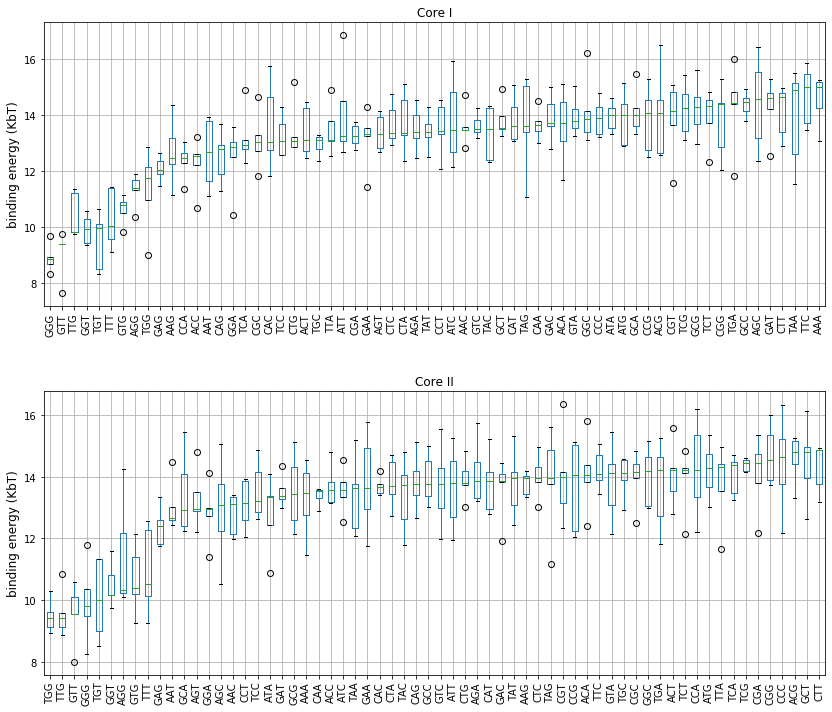

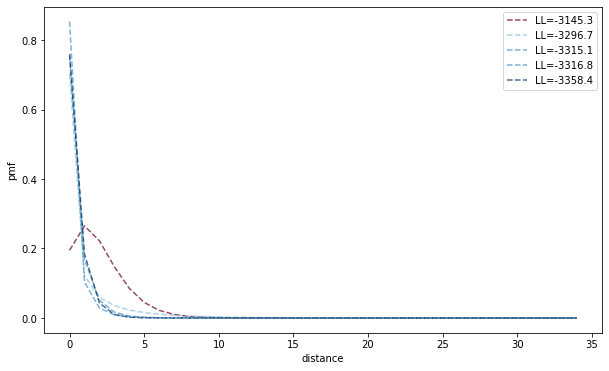

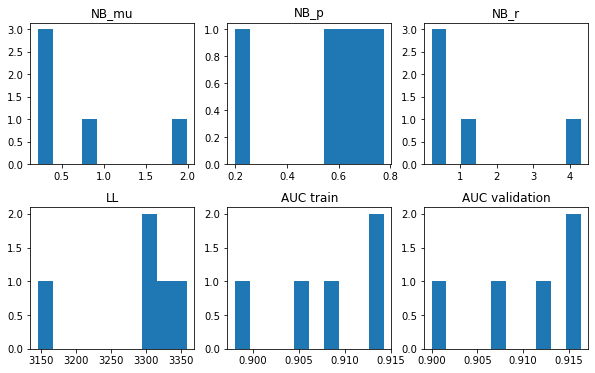

In [145]:
pdf = matplotlib.backends.backend_pdf.PdfPages("plots/TAF15/summary_%s.pdf"%keyw)

#=== plot motifs =================
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,12))
plt.subplots_adjust(hspace=0.3)

core1.boxplot(ax=ax1, rot=90)
ax1.set_title('Core I', fontsize=12)
ax1.set_ylabel('binding energy (KbT)', fontsize=12)

core2.boxplot(ax=ax2, rot=90)
ax2.set_title('Core II', fontsize=12)
ax2.set_ylabel('binding energy (KbT)', fontsize=12)

pdf.savefig(fig)

#=====================

r = data.sort_values(by='LL')['r'].values
p = data.sort_values(by='LL')['p'].values
ll = -data.sort_values(by='LL')['LL'].values

#== plot distance distributions =================

fig, ax = plt.subplots(figsize=(10,6))

xx = np.arange(35)
cmap = matplotlib.cm.get_cmap('RdBu_r')
colors = (ll-min(ll))/(max(ll)-min(ll))
colors = [cmap(c) for c in colors]

for i in range(len(r)):
    ax.plot(xx, nbinom.pmf(xx, r[i], p[i]), alpha=0.7, color=colors[i], linestyle='--', label=f'LL={ll[i]:.1f}')

if False:
    ax.plot(xx, nbinom.pmf(xx, n_orig, p_orig), color='red')
    ax2 = ax.twinx()
    ax2.plot(np.arange(0,len(distance_enrichment)), distance_enrichment, color='green')
ax.legend()    
ax.set_xlabel('distance')
ax.set_ylabel('pmf')
pdf.savefig(fig)

#== plot distance attributes and energy distribution ====

fig, axes = plt.subplots(2,3, figsize=(10,6))
plt.subplots_adjust(hspace=0.3)

ax1, ax2, ax3 = axes[0]

_ = ax1.hist(((1-p)*r)/(p))
ax1.set_title('NB_mu')

_ = ax2.hist(p)
ax2.set_title('NB_p')

_ = ax3.hist(r)
ax3.set_title('NB_r')


ax1, ax2, ax3 = axes[1]

_ = ax1.hist(data.loc[:,'LL'].values)
ax1.set_title('LL')

_ = ax2.hist(data.loc[:,'auct'].values)
ax2.set_title('AUC train')

_ = ax3.hist(data.loc[:,'aucv'].values)
ax3.set_title('AUC validation')

pdf.savefig(fig)


pdf.close()

In [147]:
len(factors)

94

### read files SELEX

number of files: 5
number of files: 5
number of files: 5
number of files: 5
number of files: 5
number of files: 5
number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

number of files: 5


/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/salma/anaconda3/envs/rbp_motif/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too muc

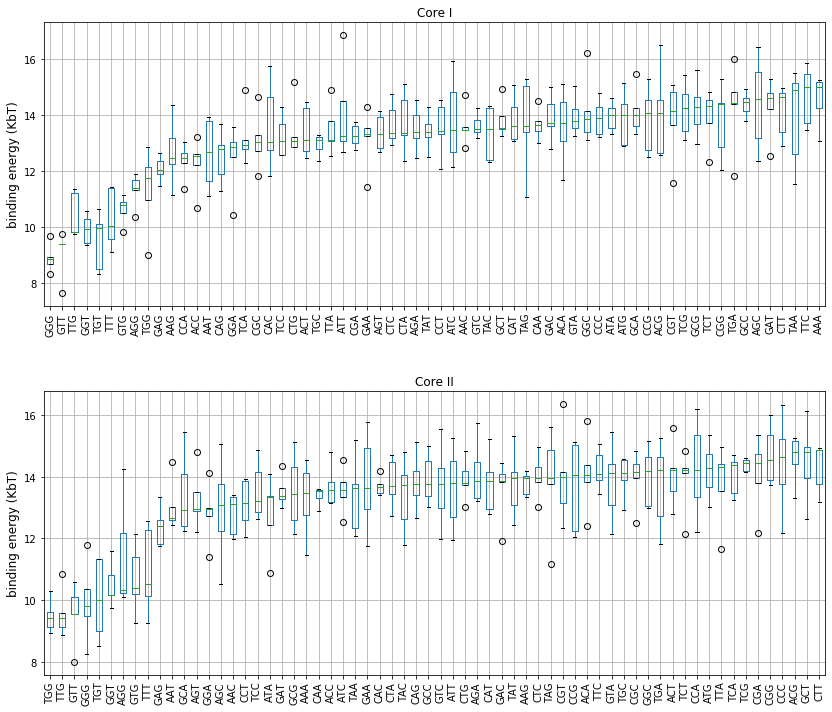

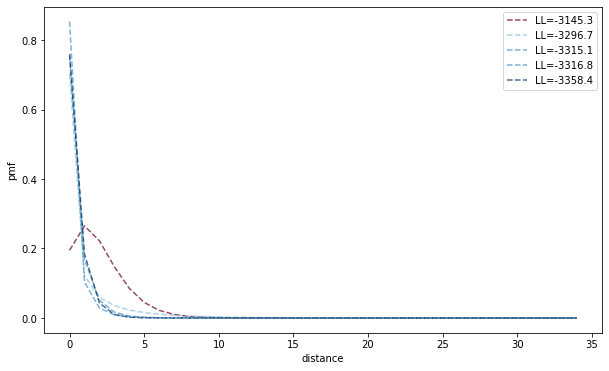

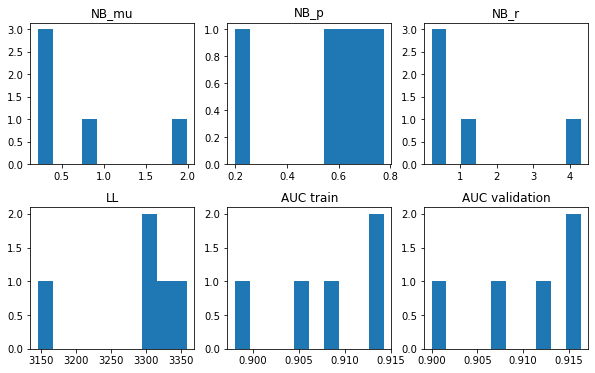

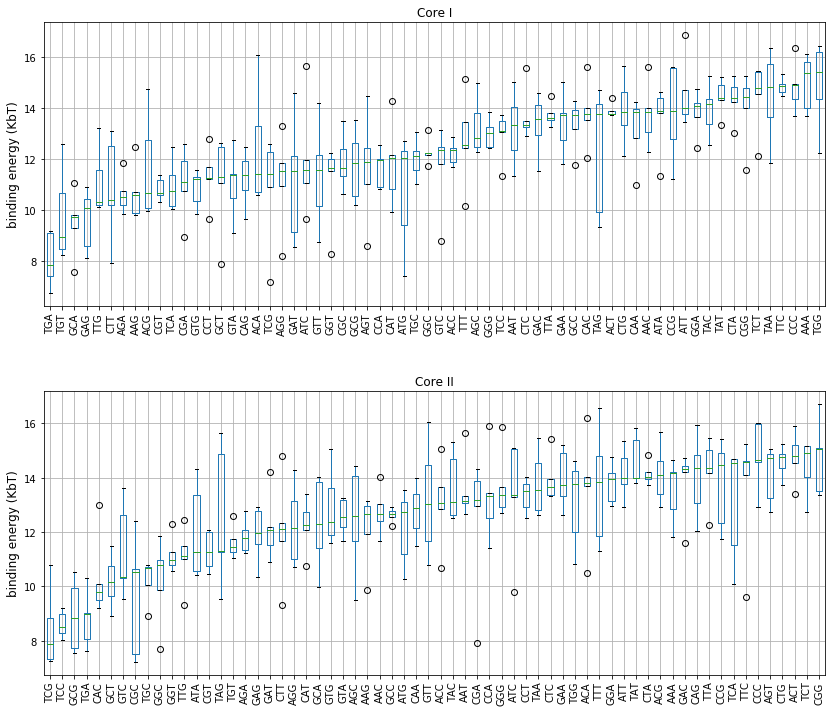

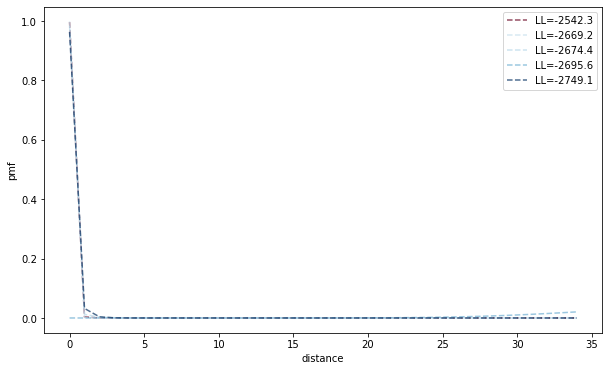

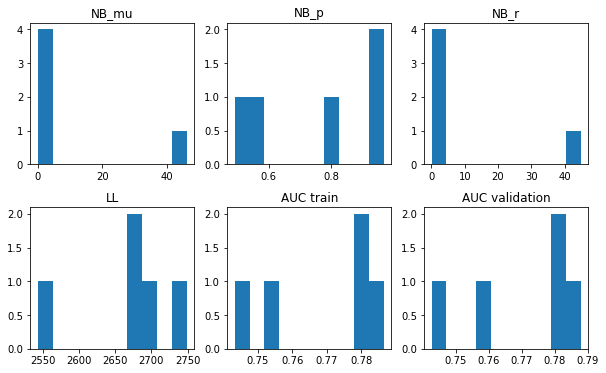

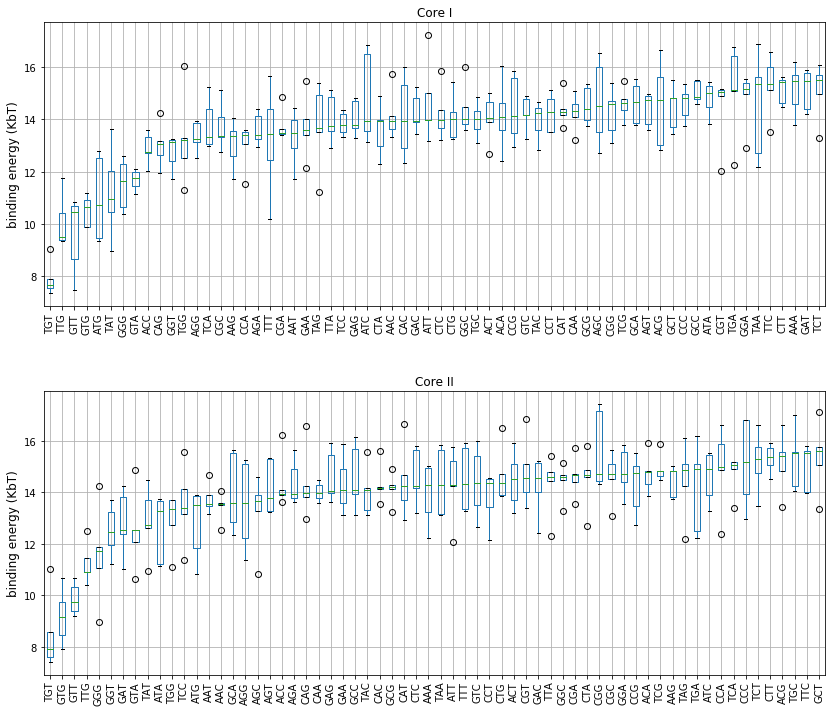

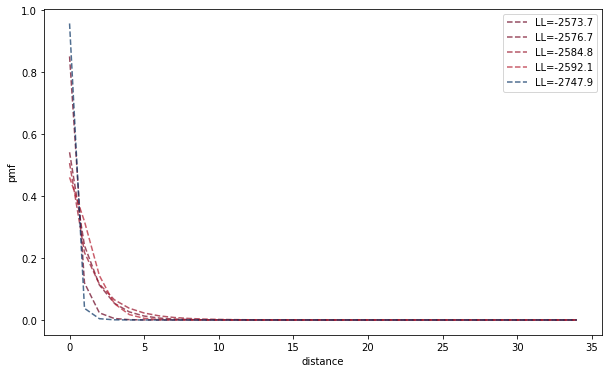

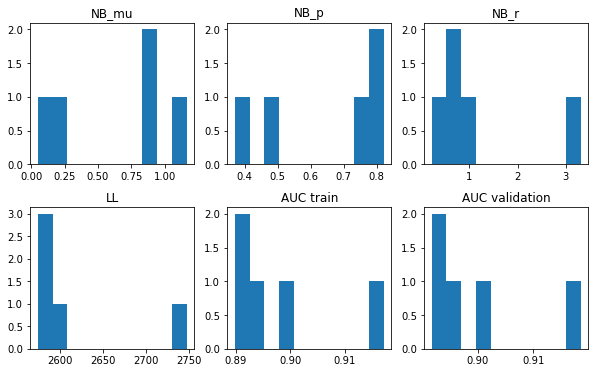

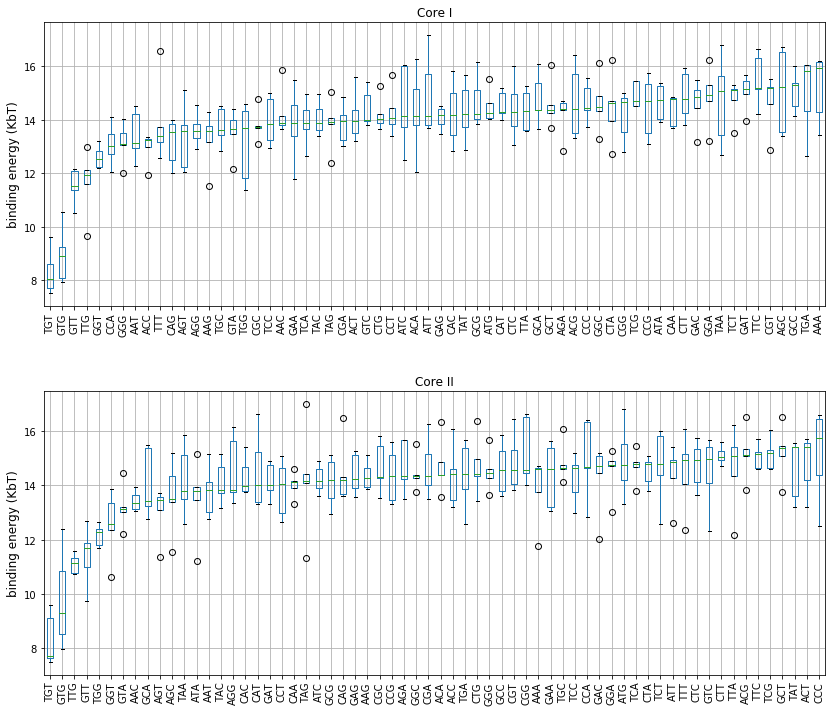

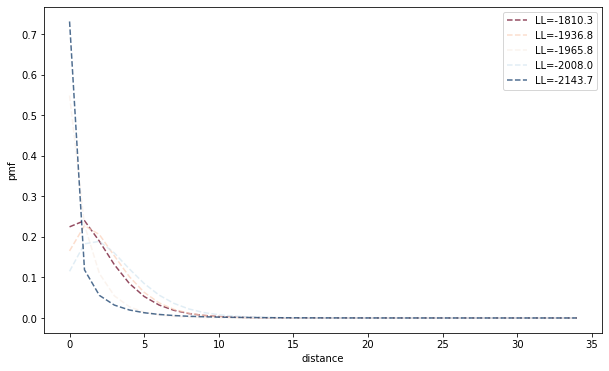

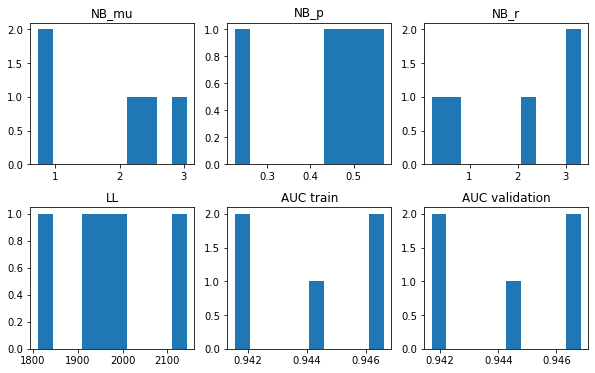

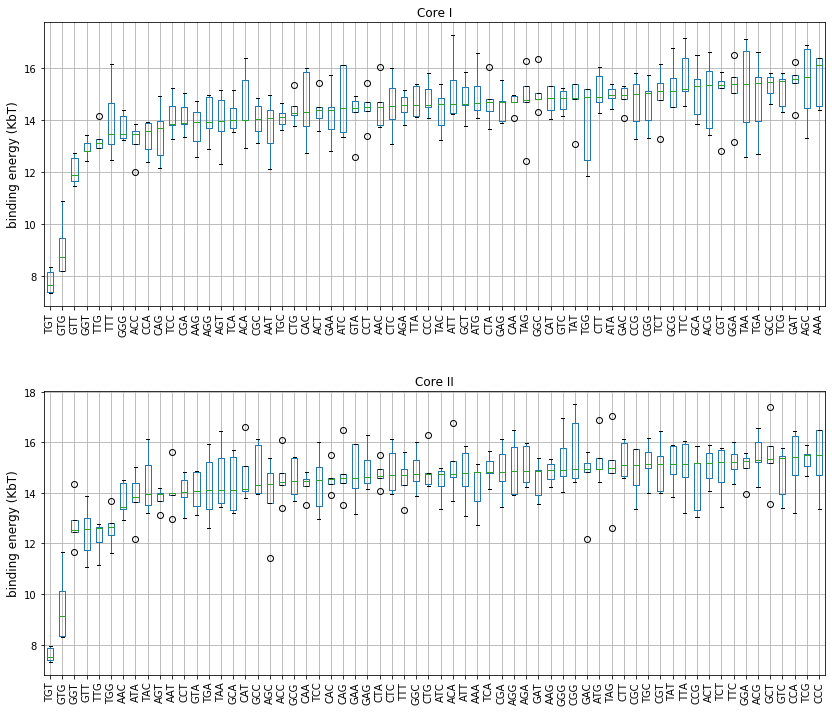

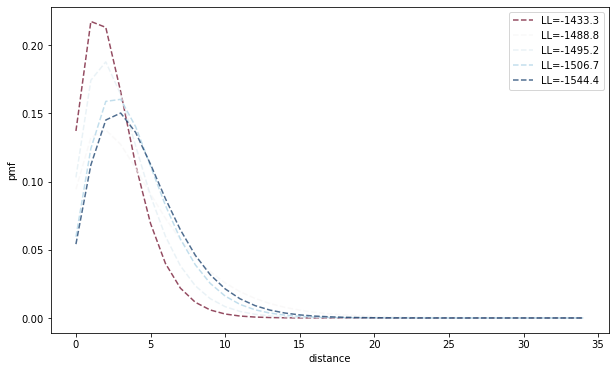

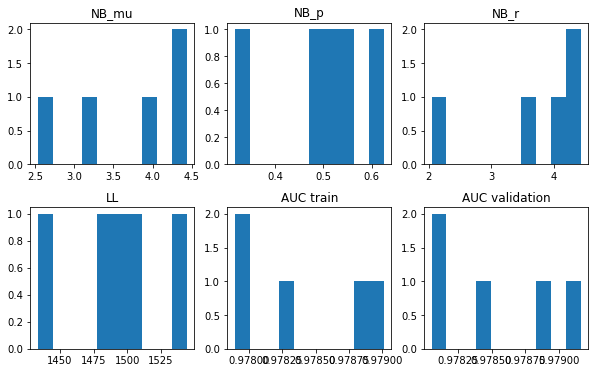

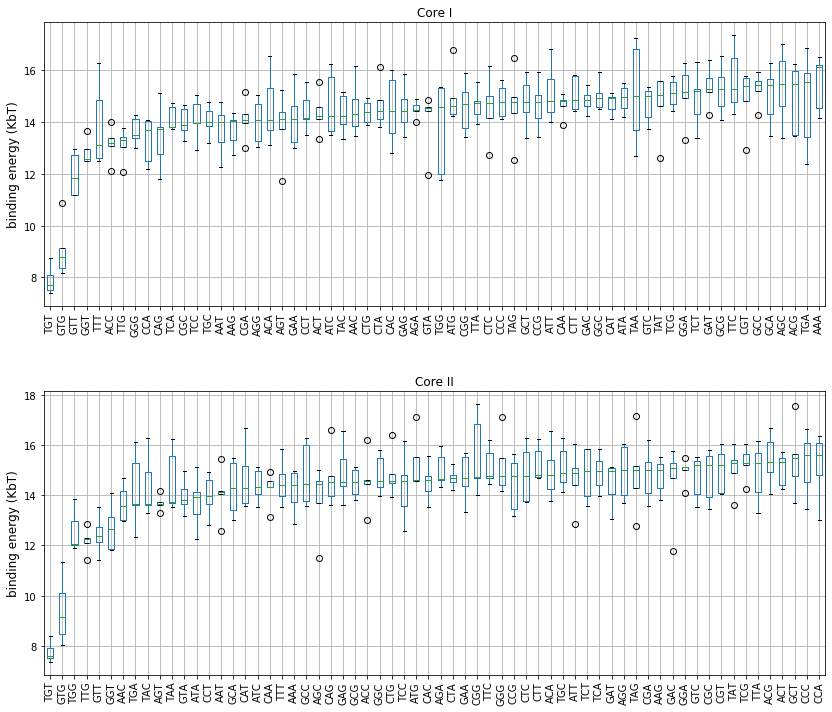

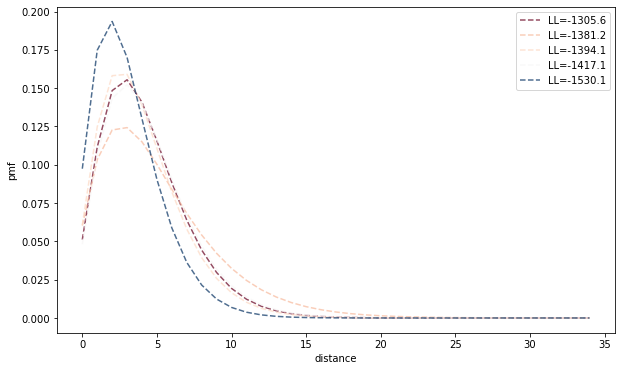

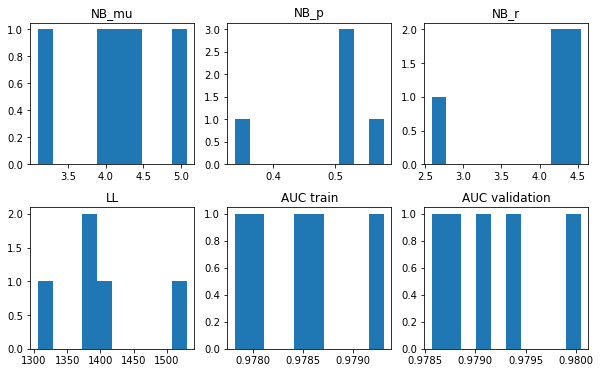

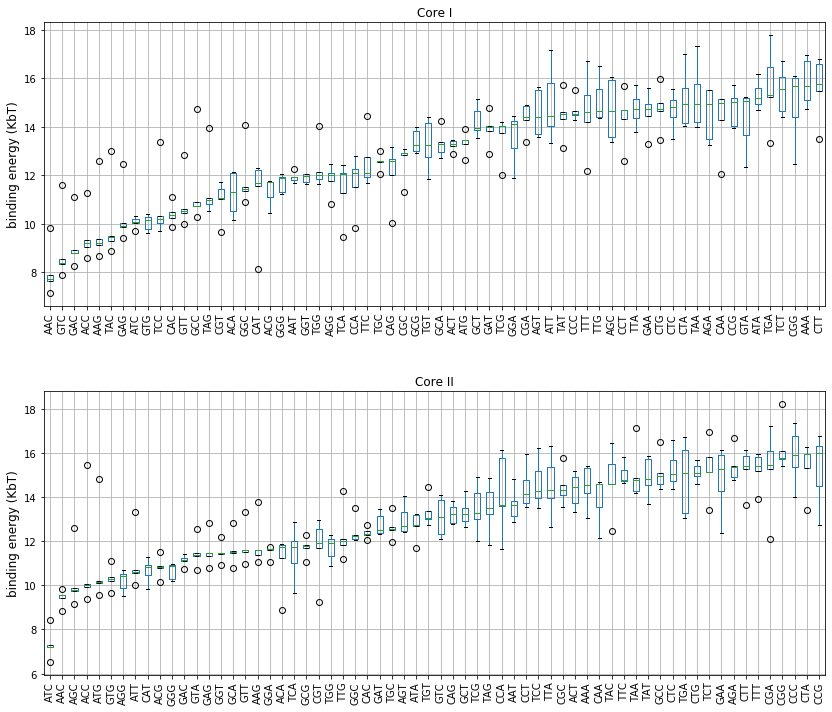

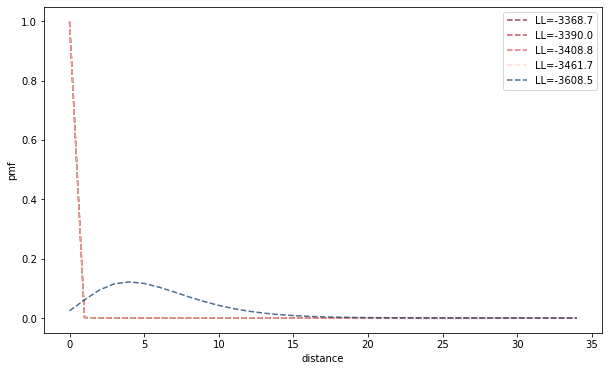

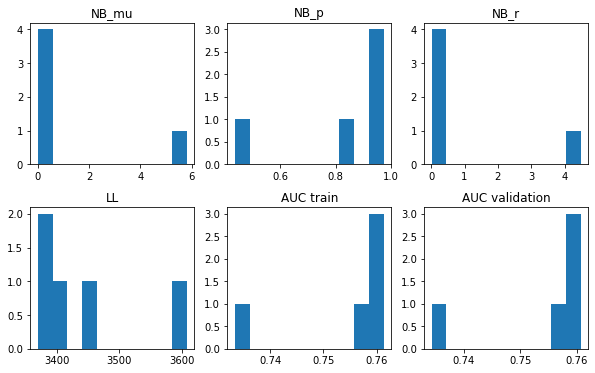

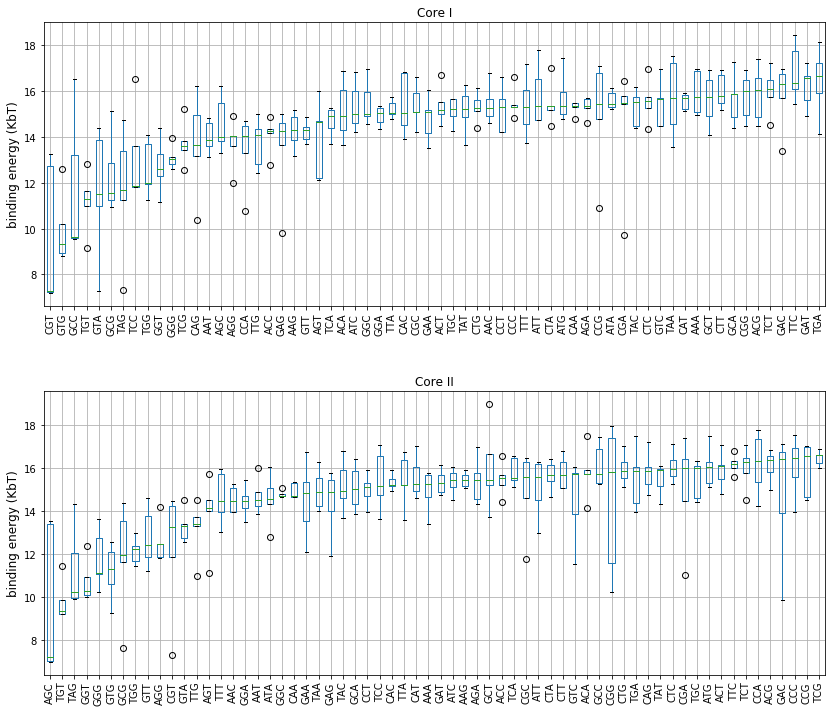

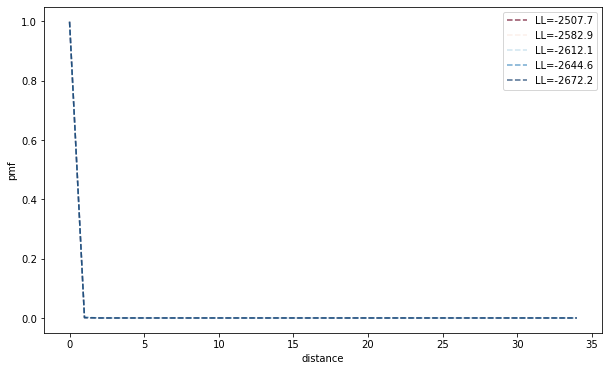

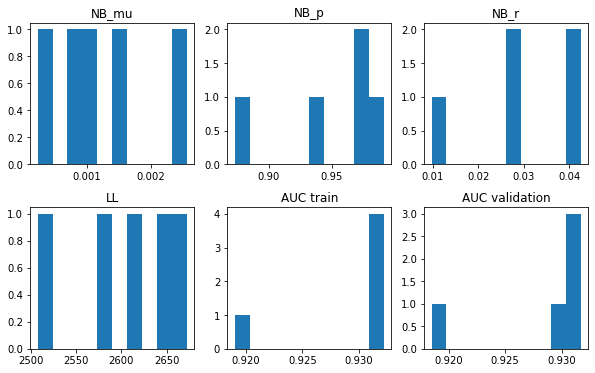

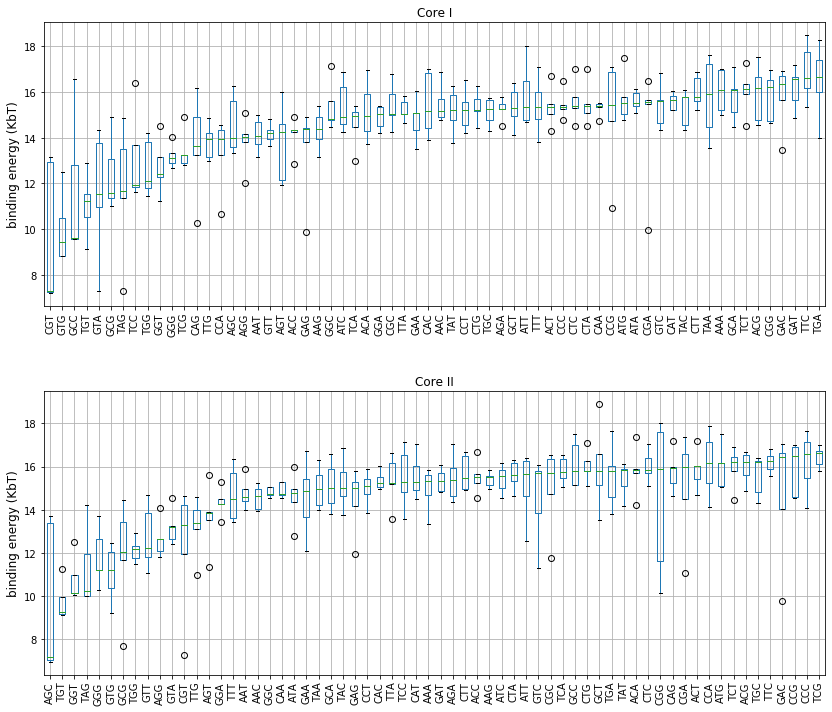

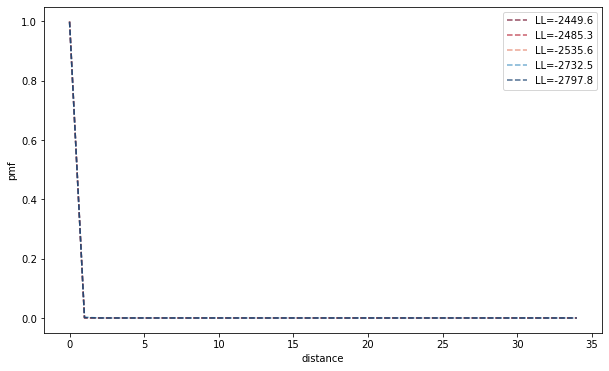

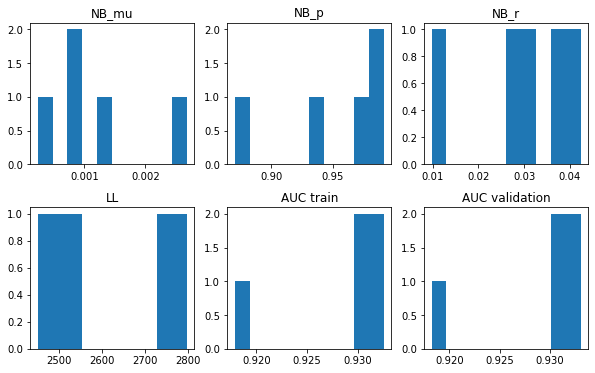

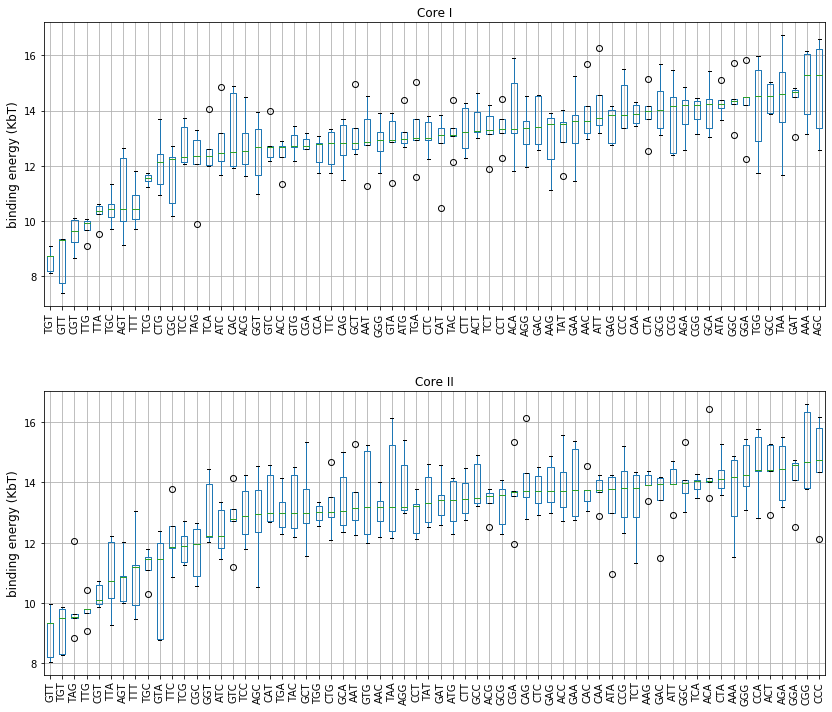

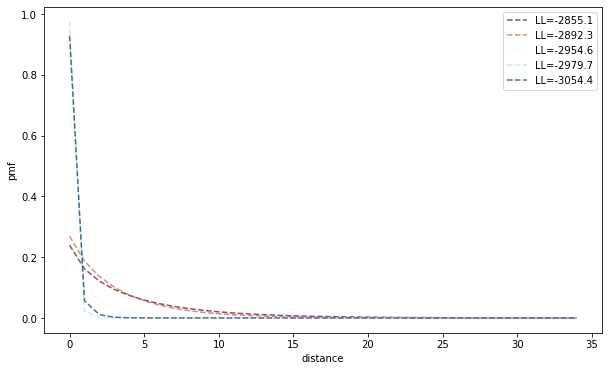

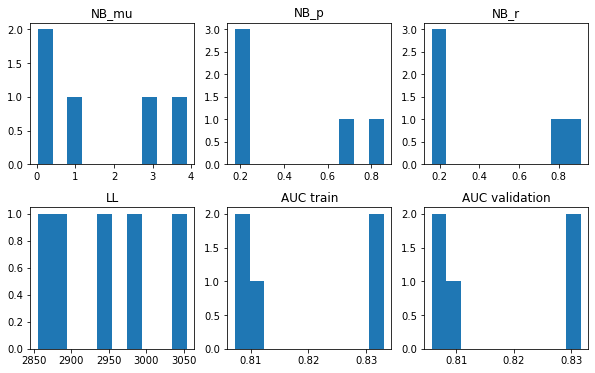

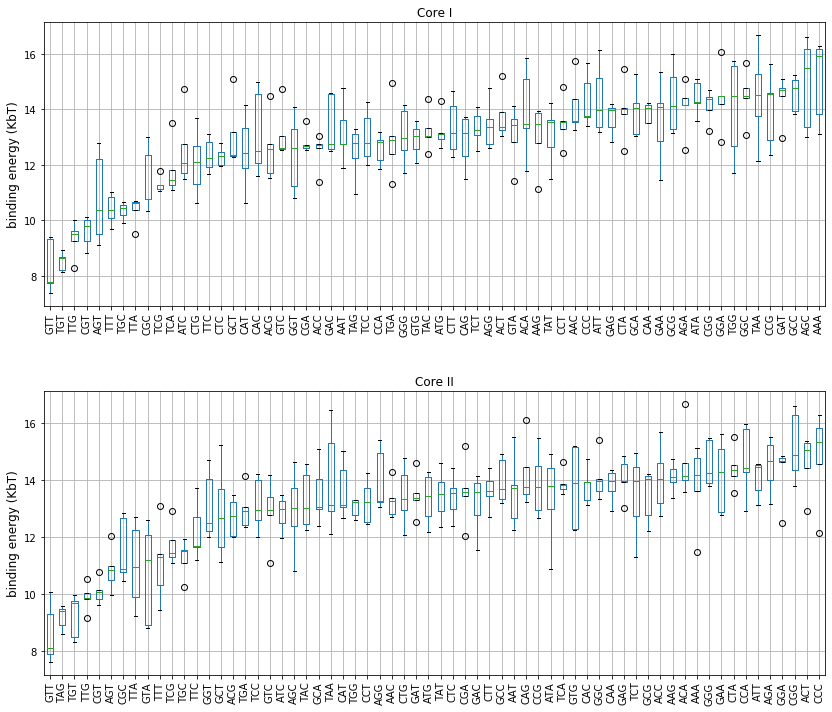

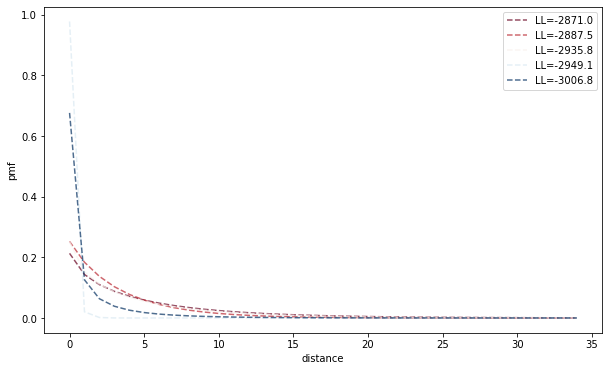

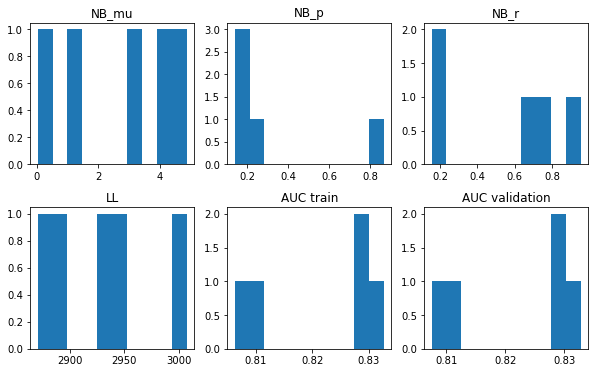

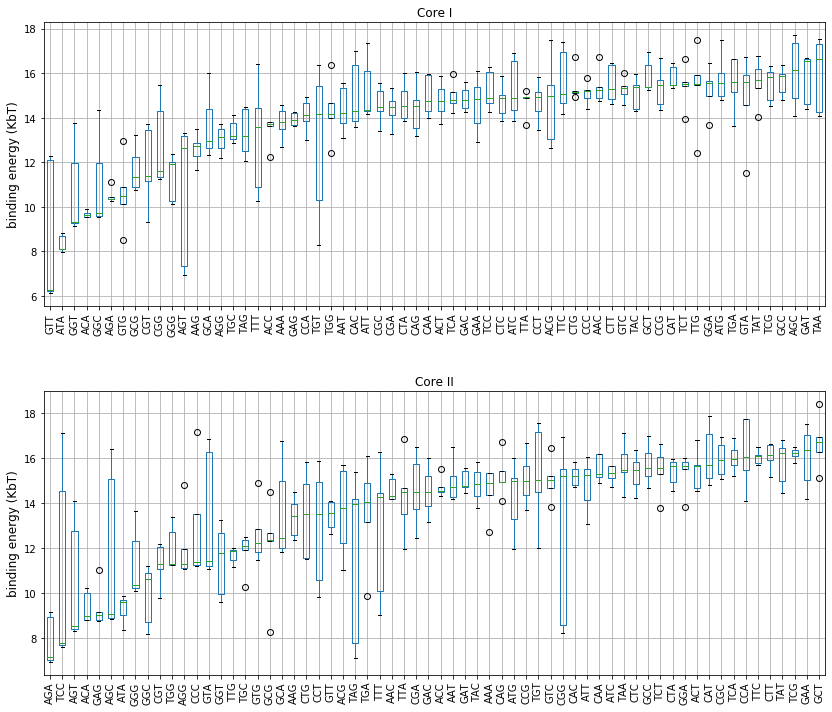

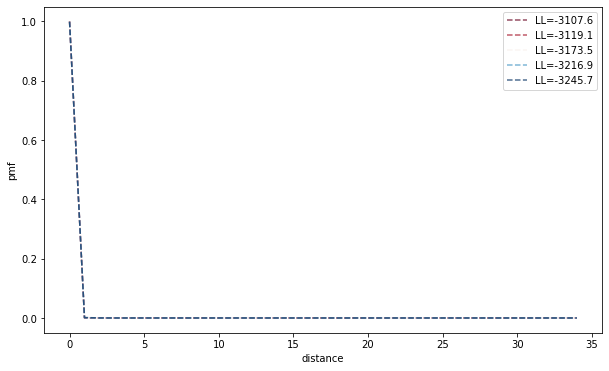

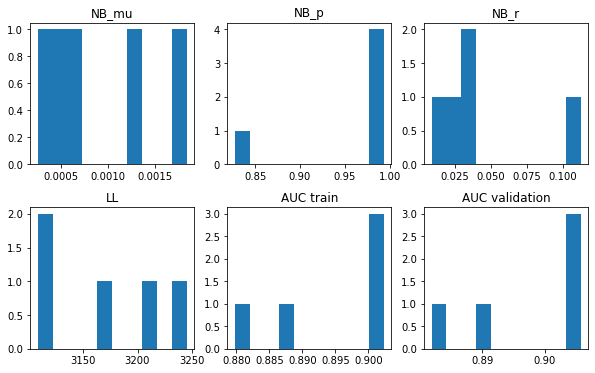

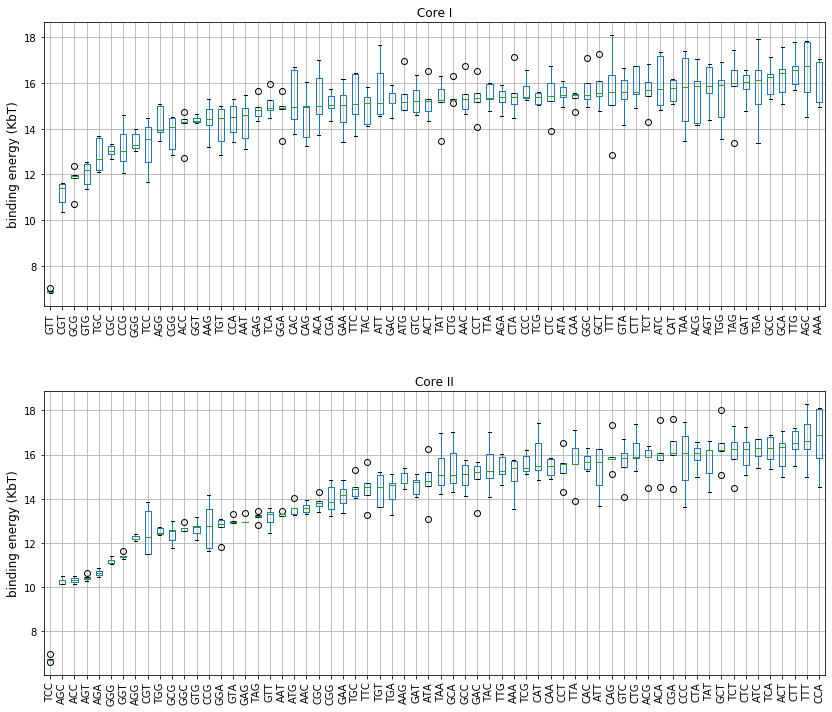

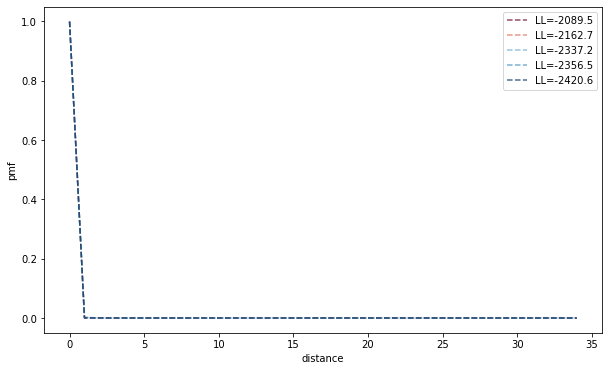

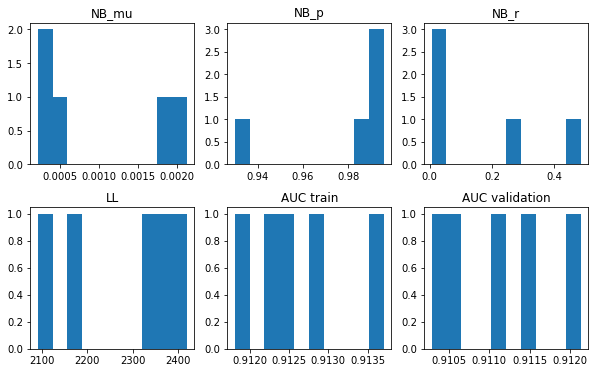

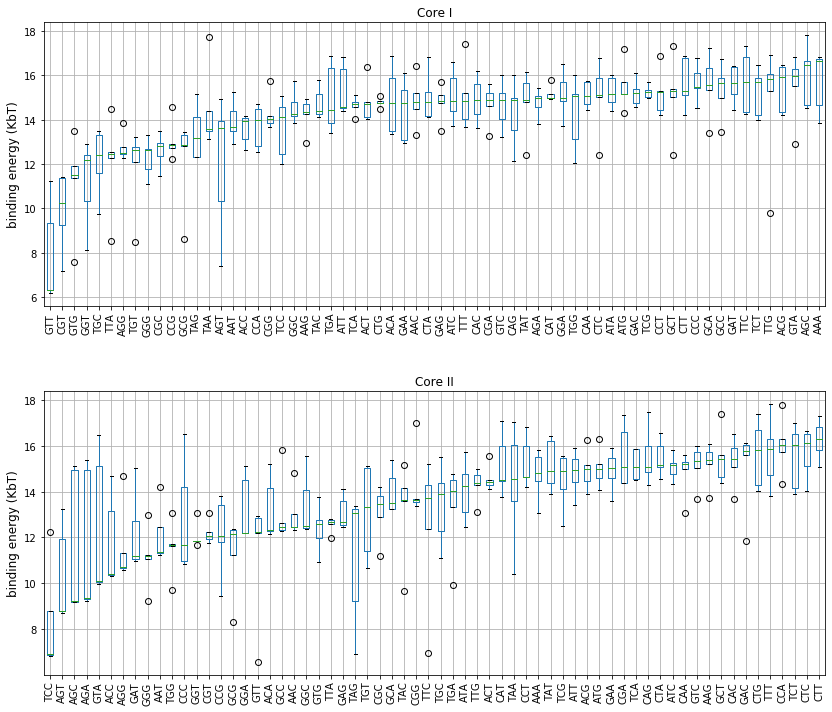

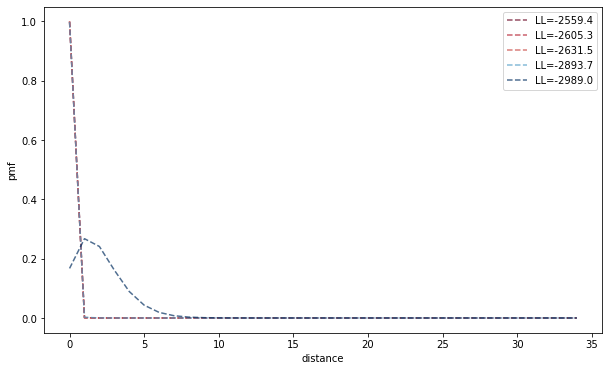

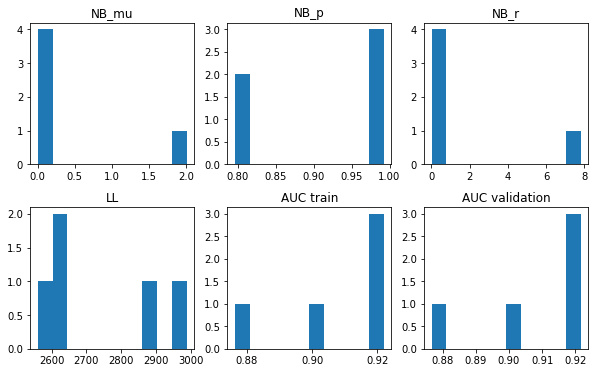

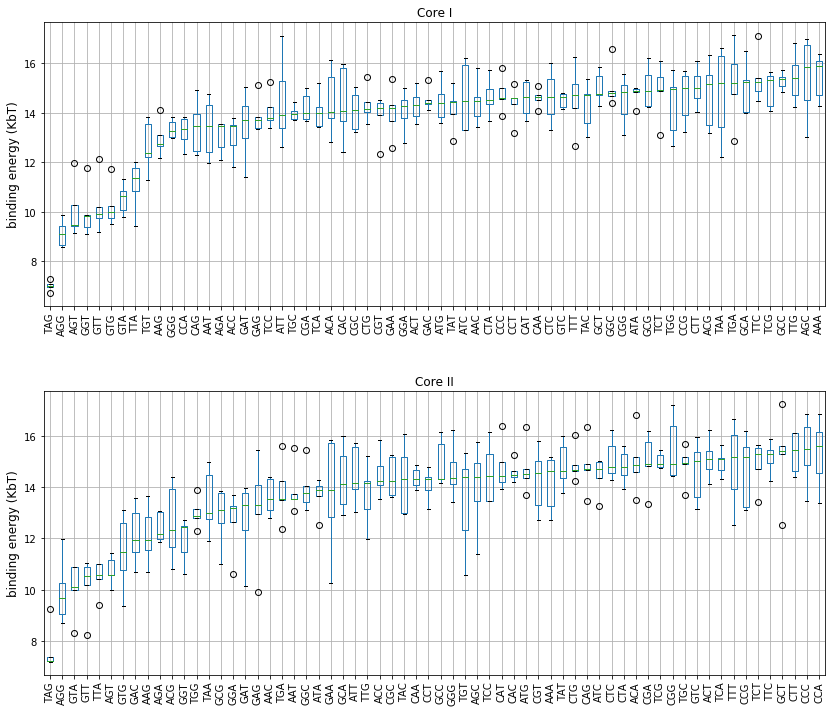

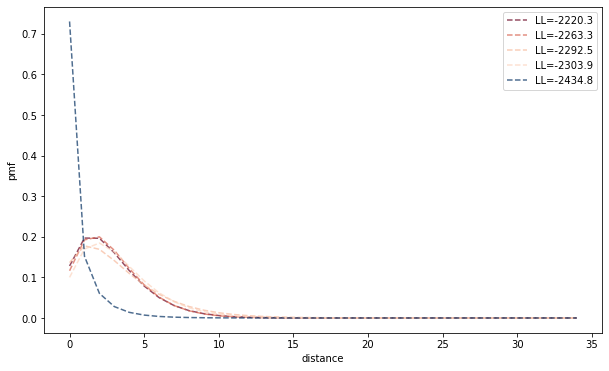

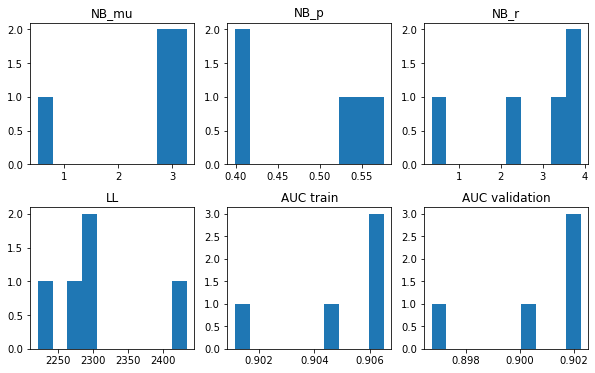

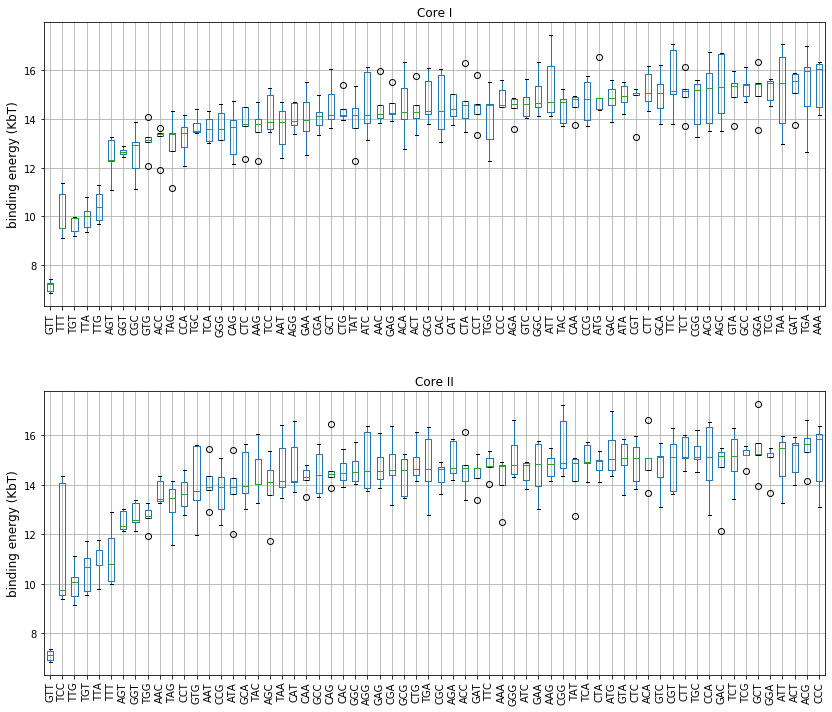

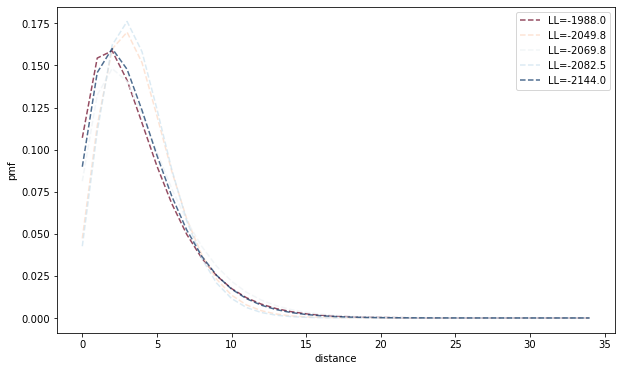

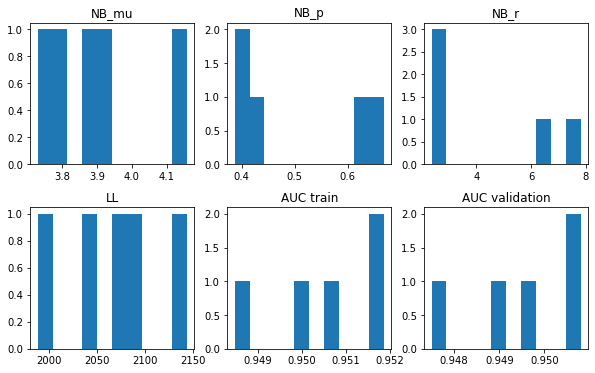

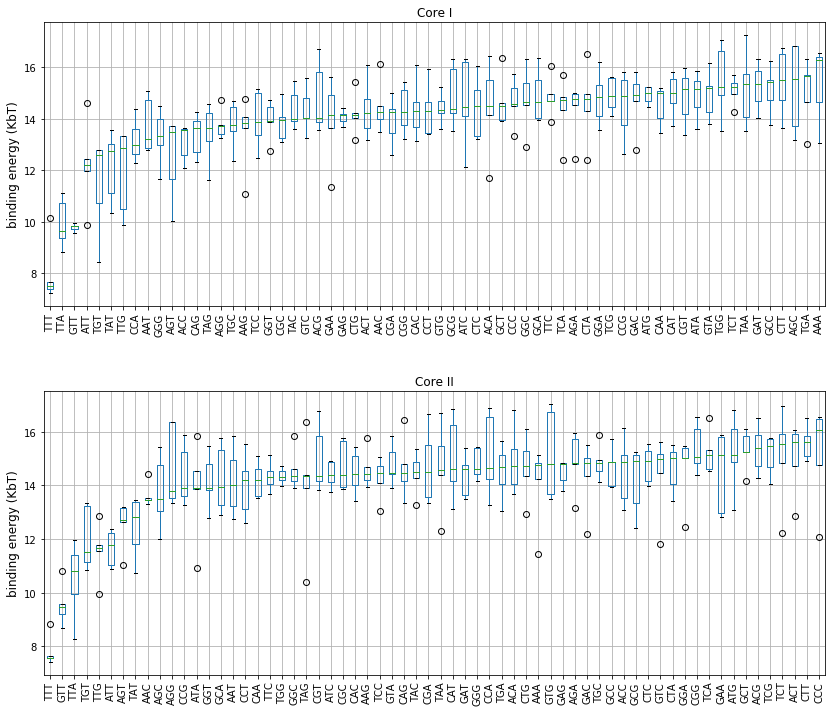

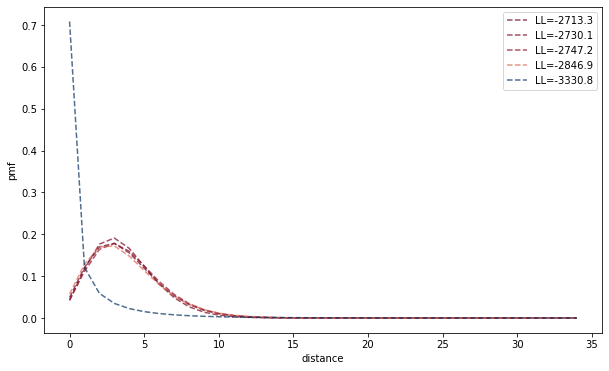

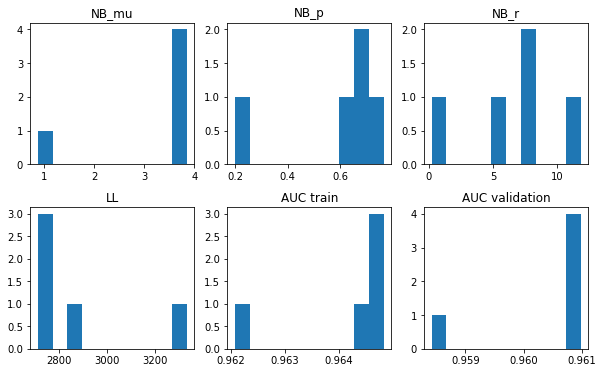

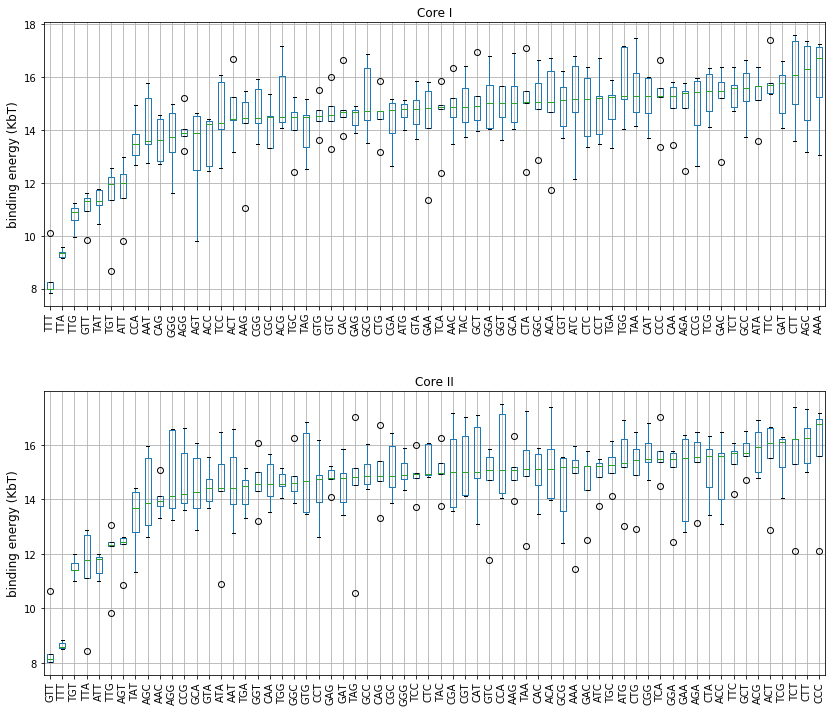

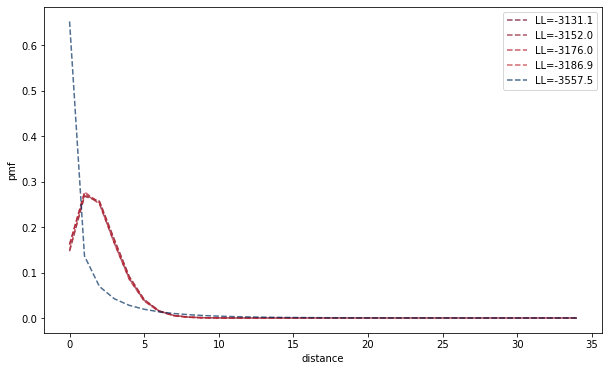

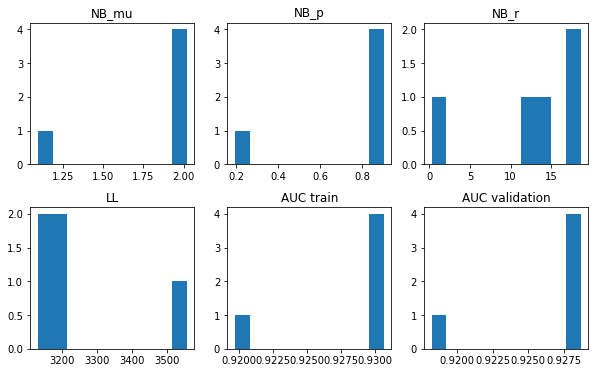

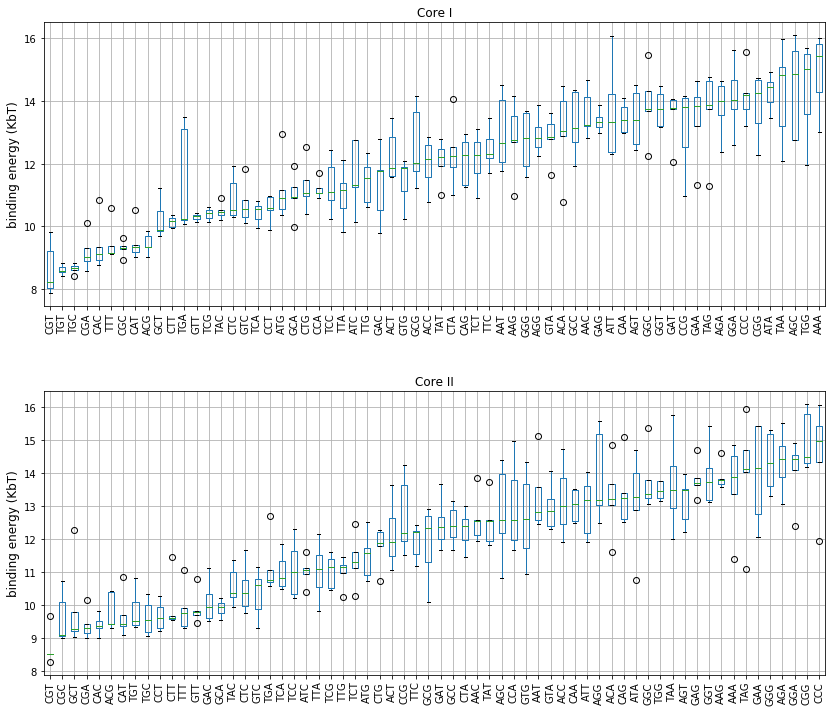

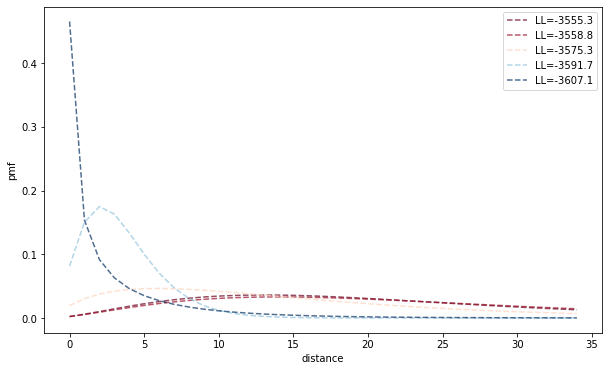

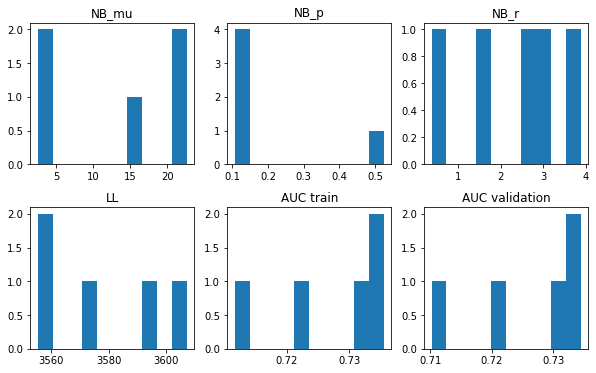

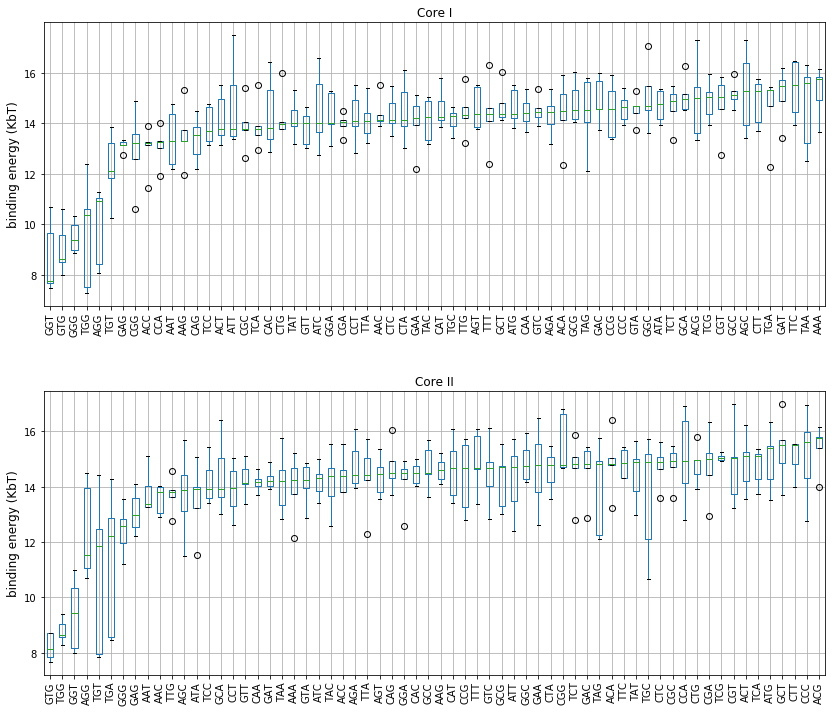

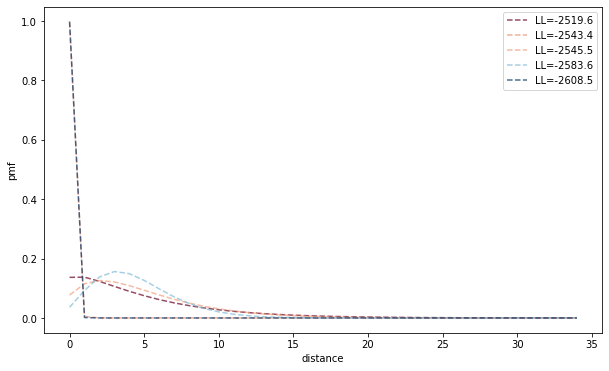

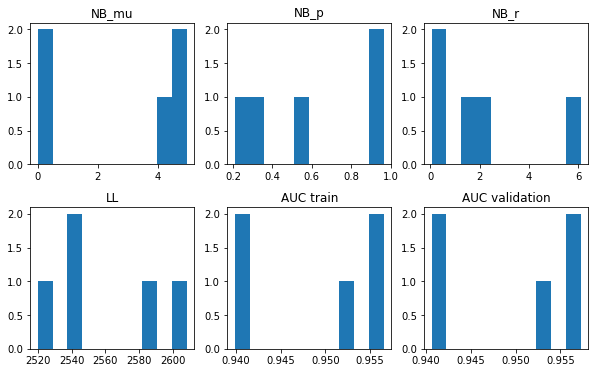

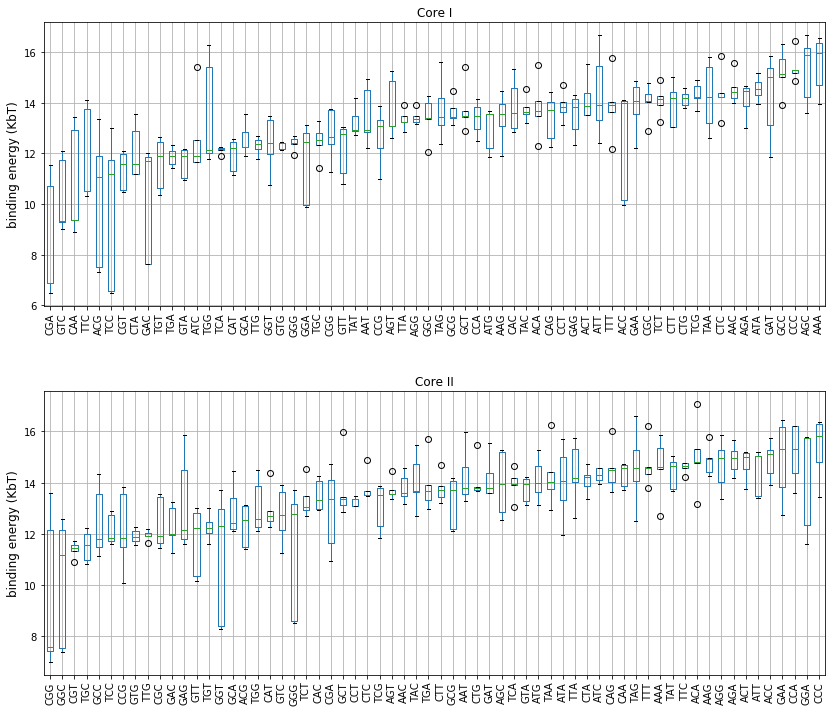

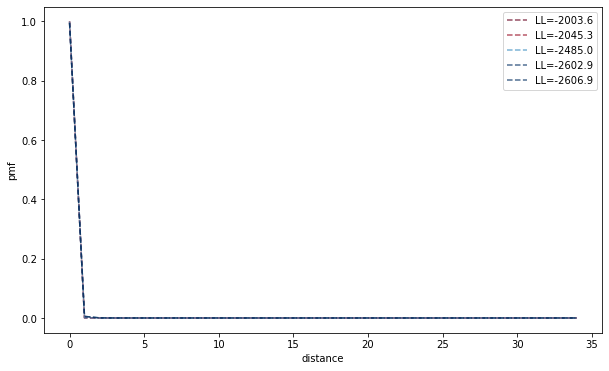

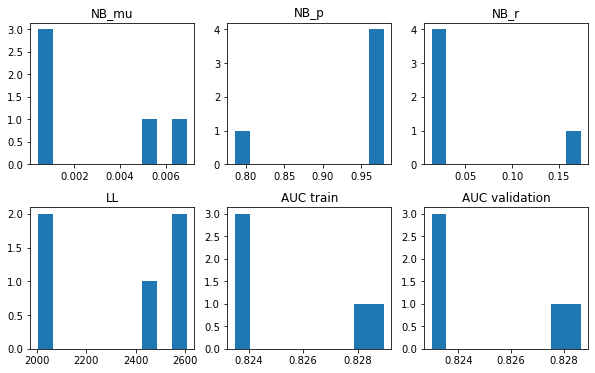

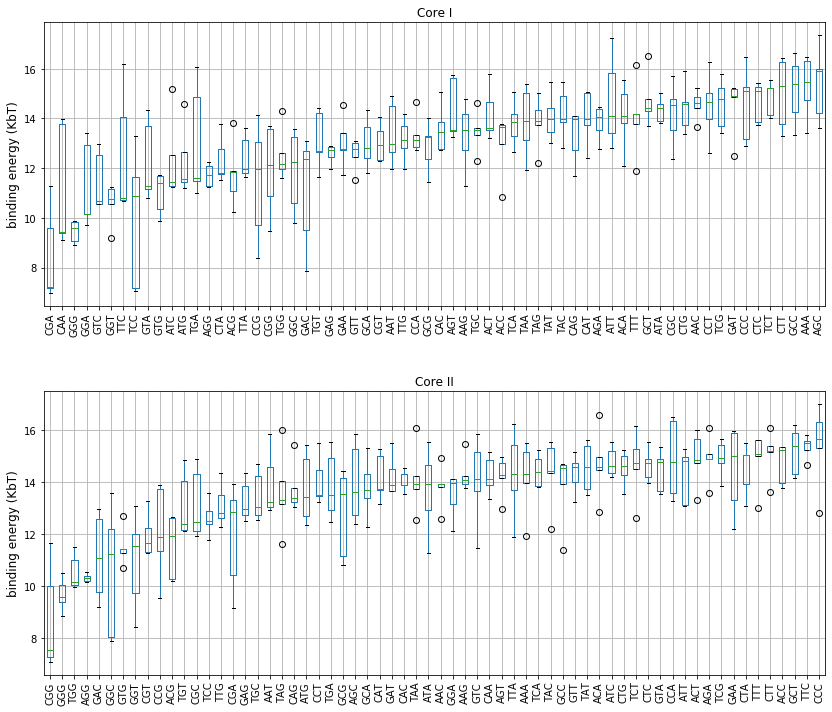

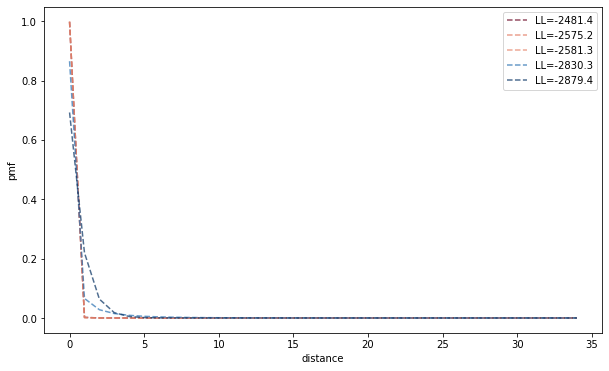

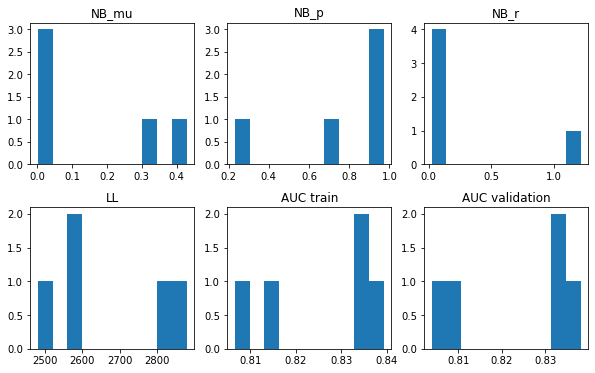

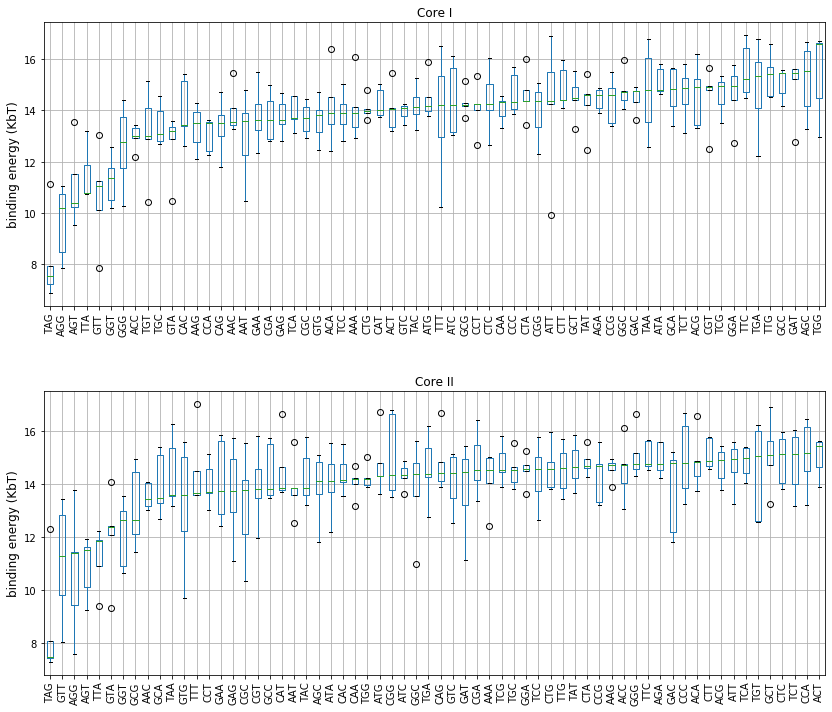

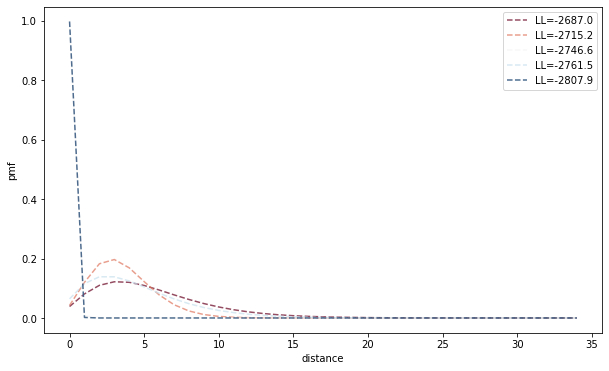

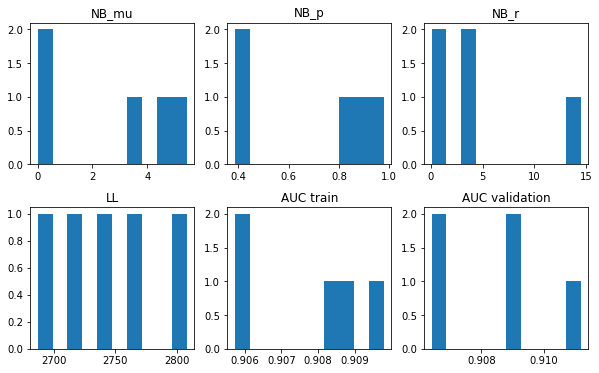

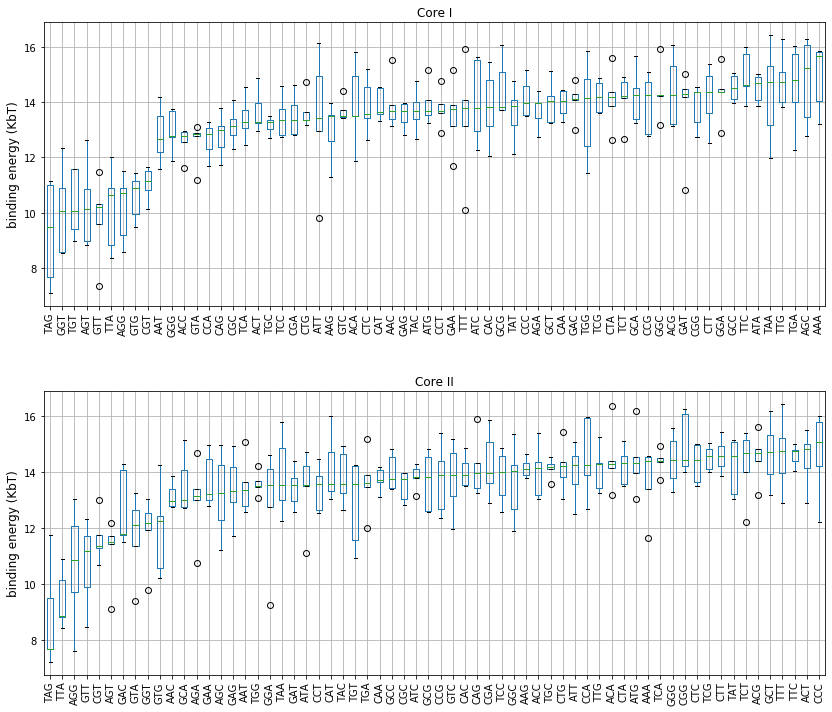

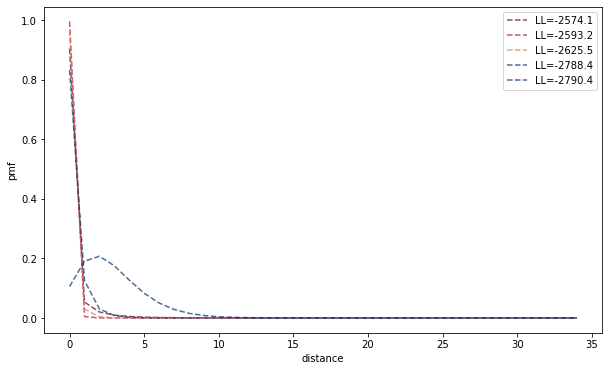

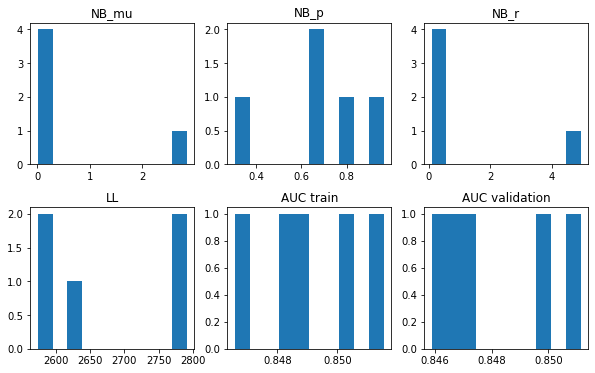

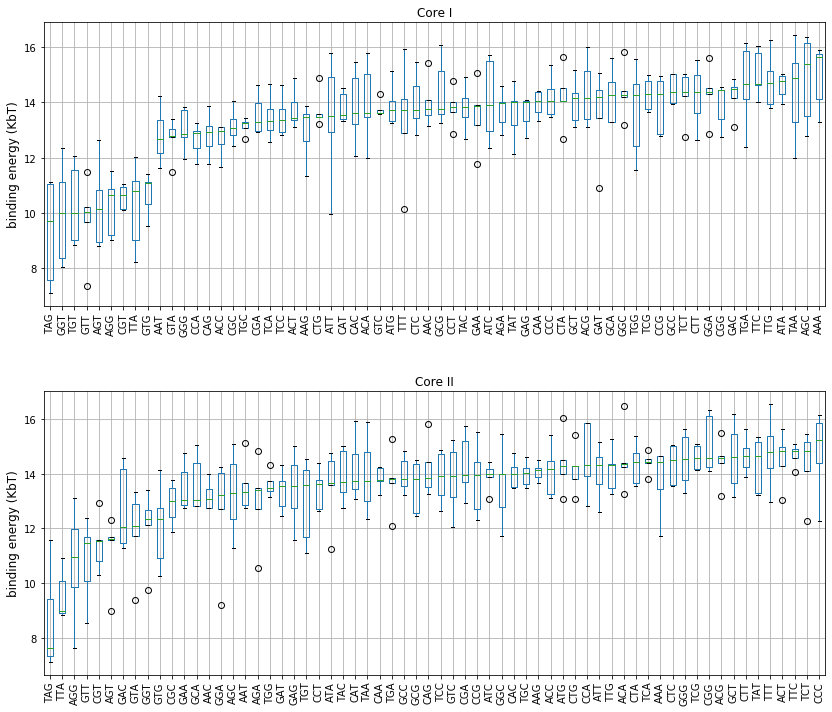

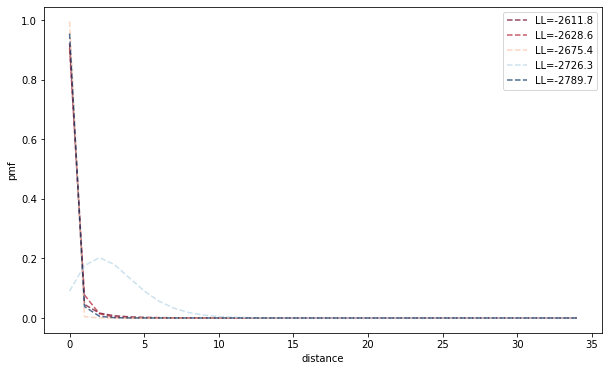

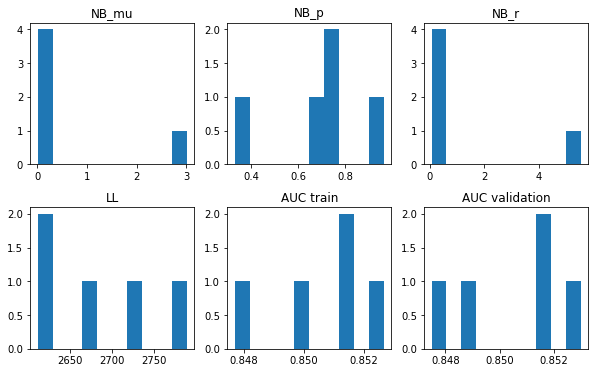

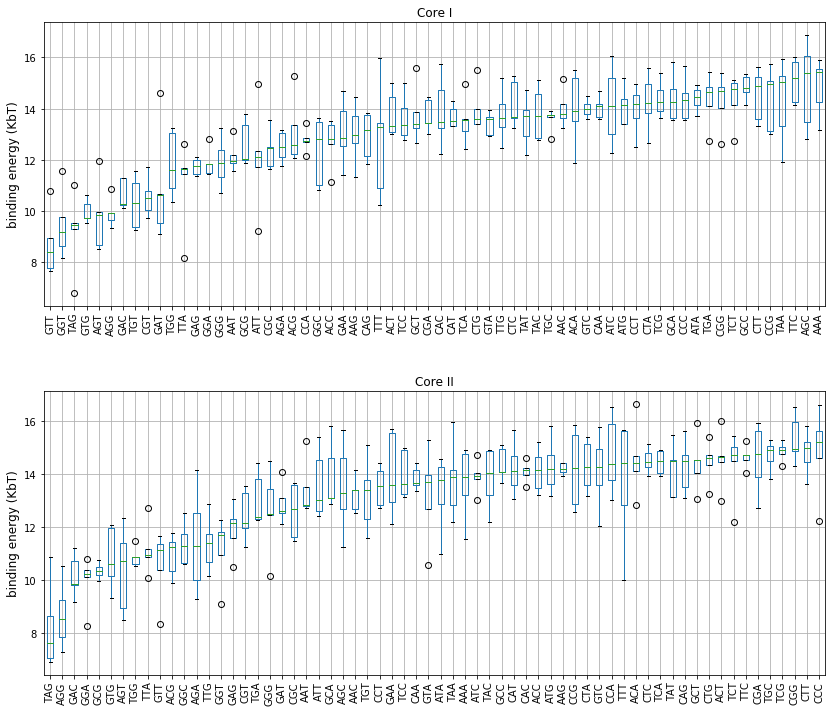

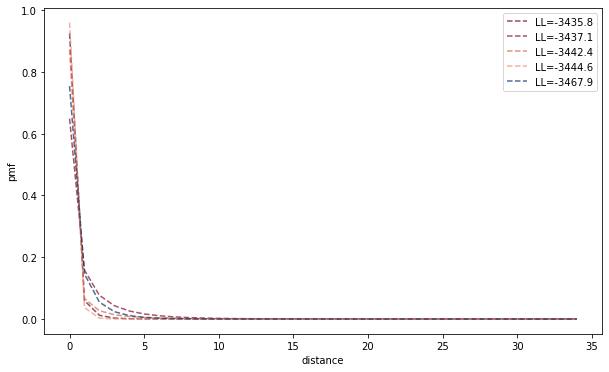

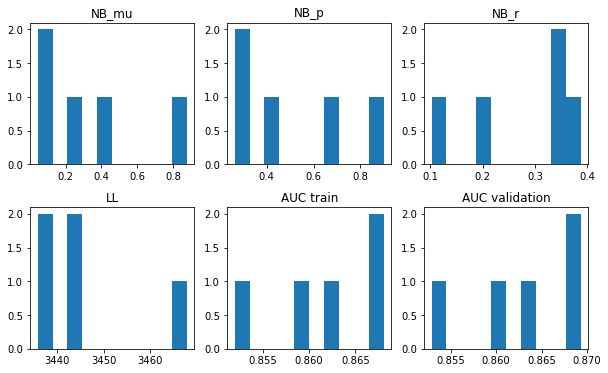

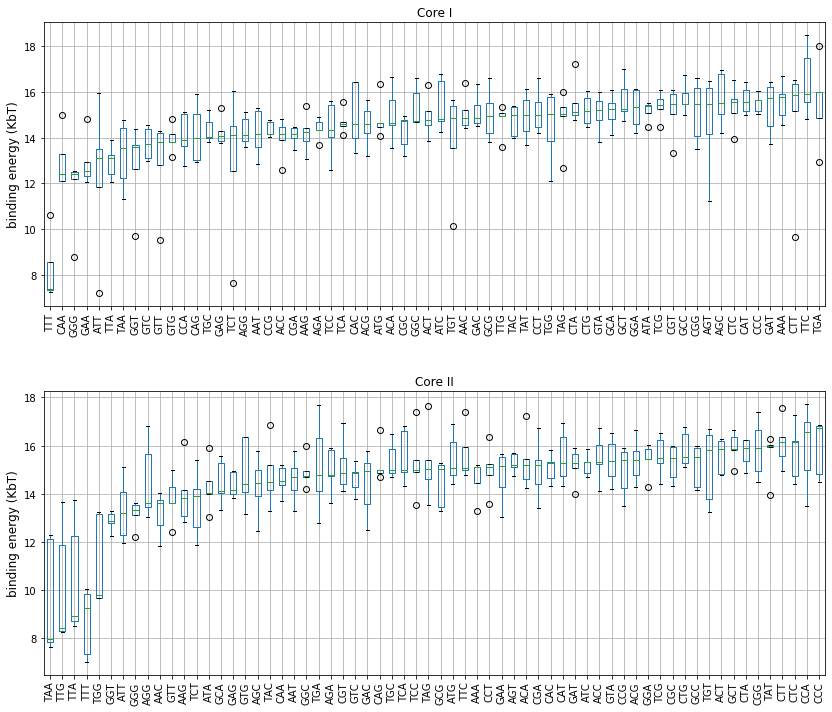

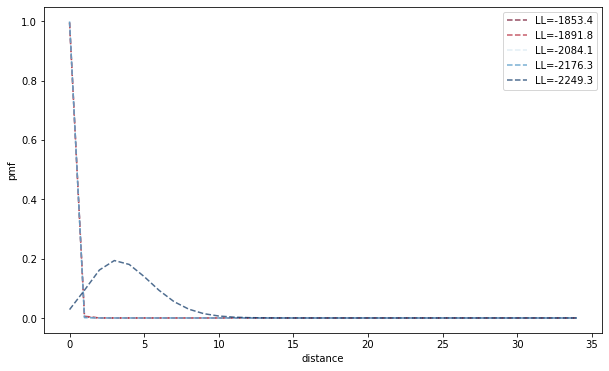

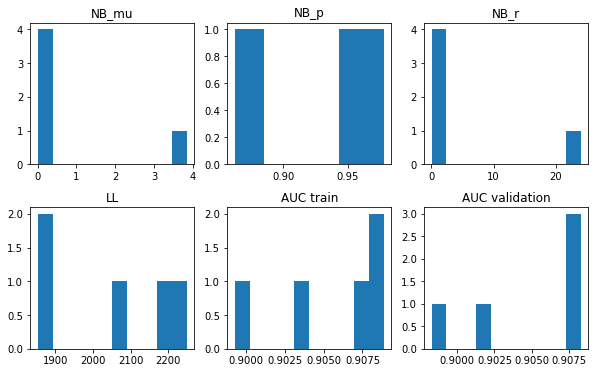

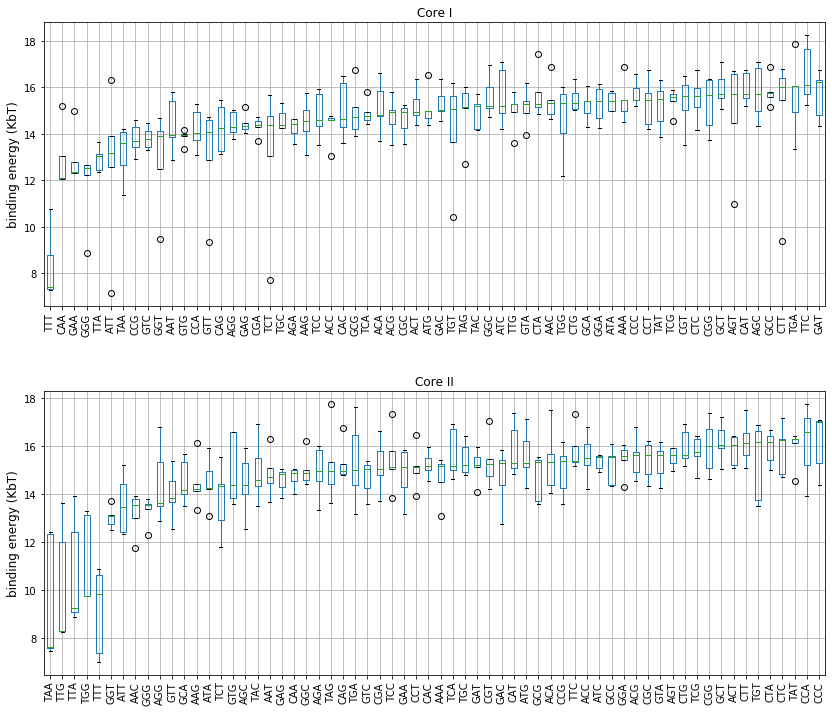

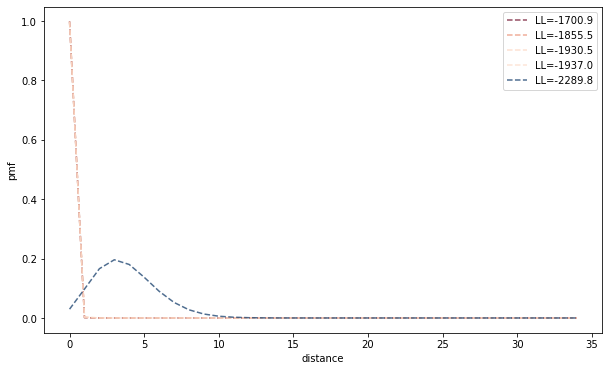

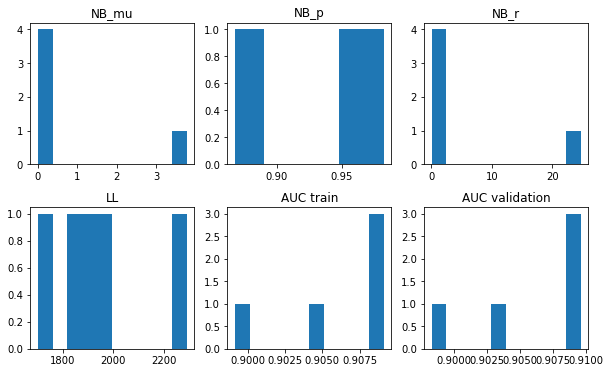

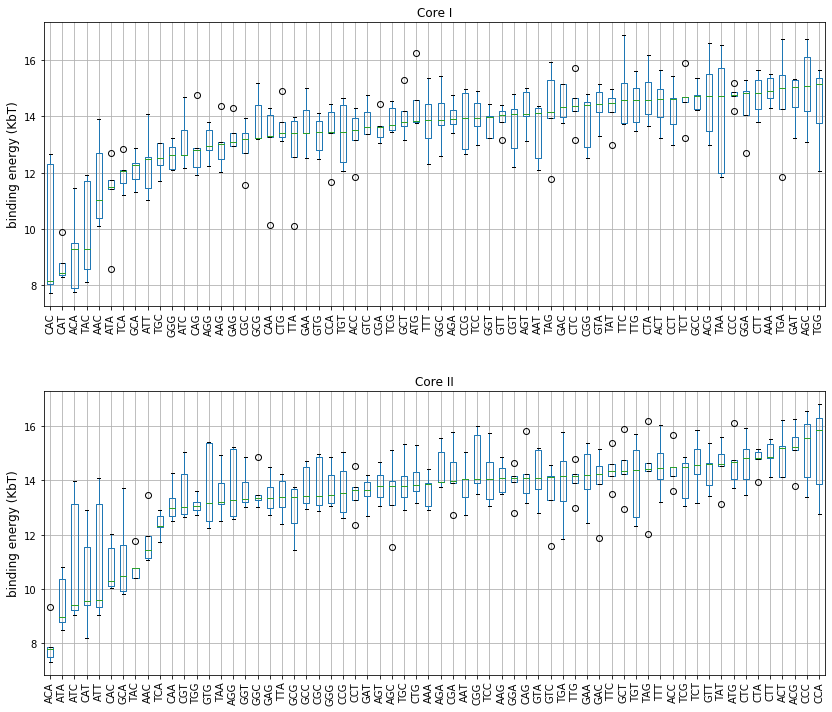

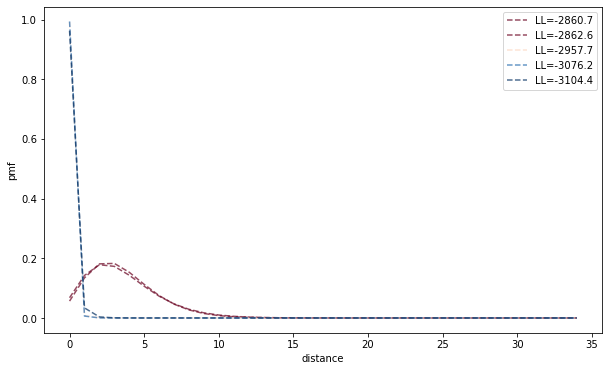

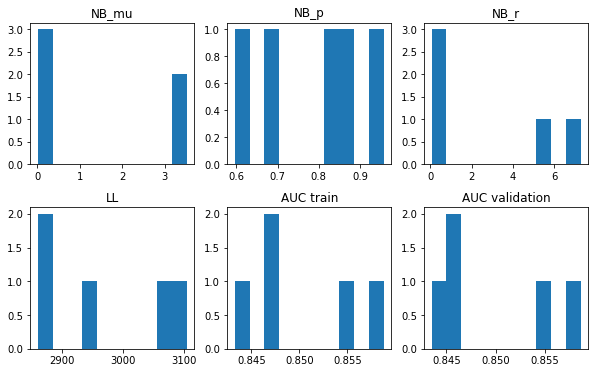

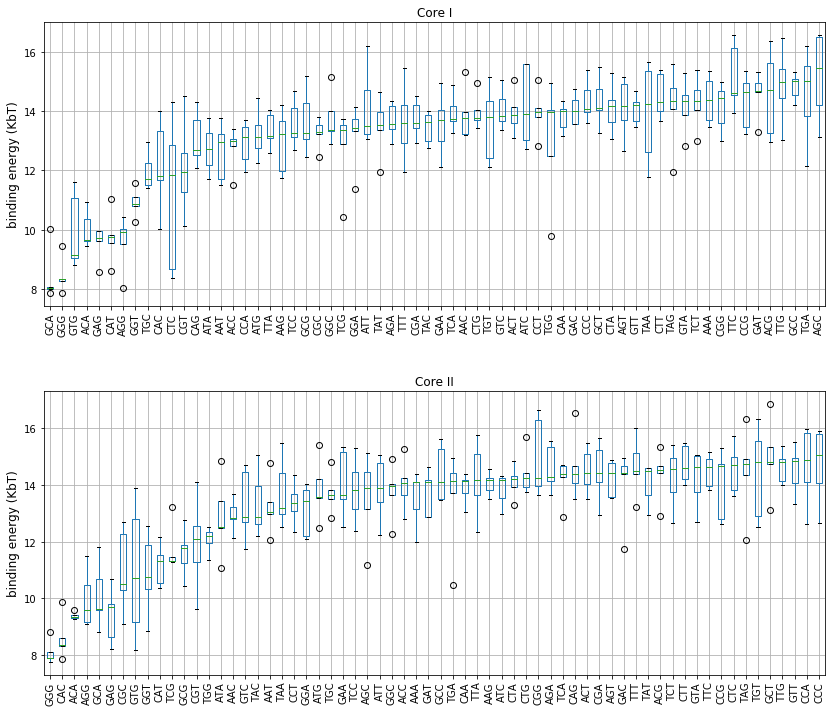

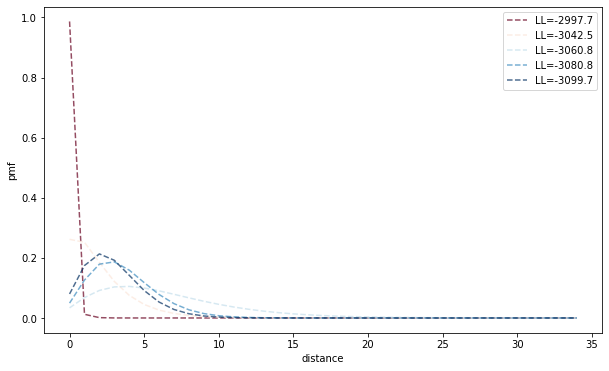

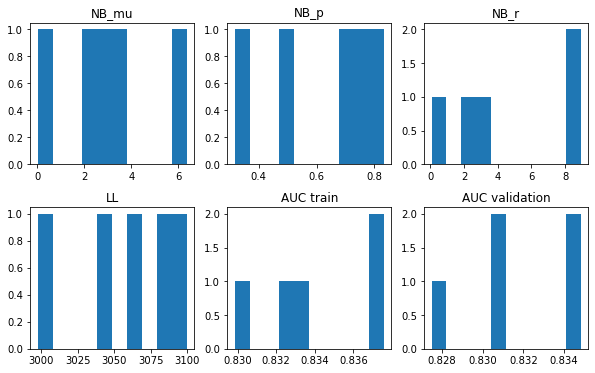

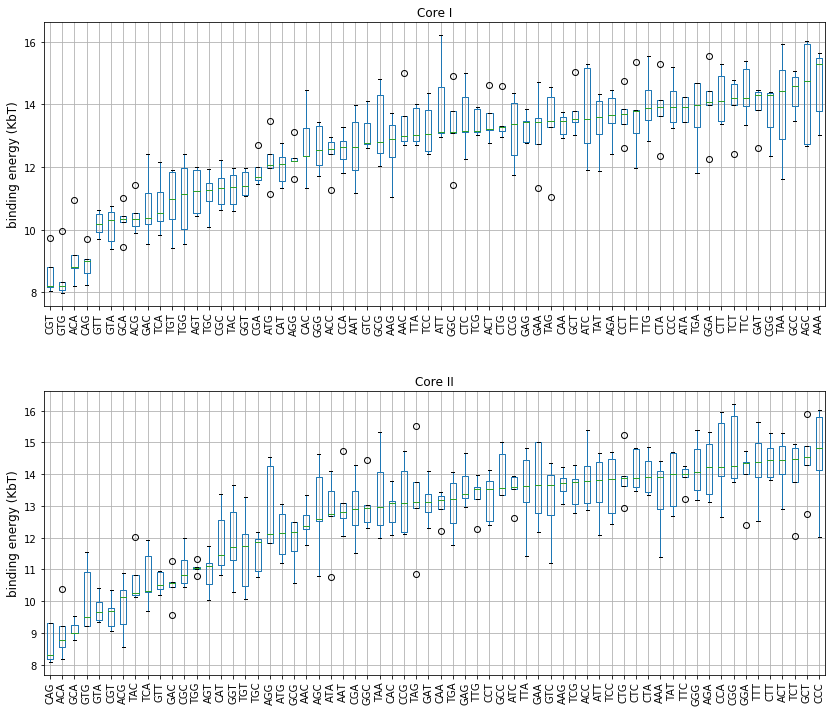

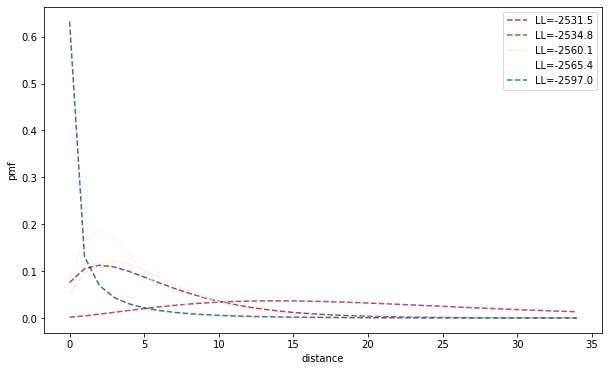

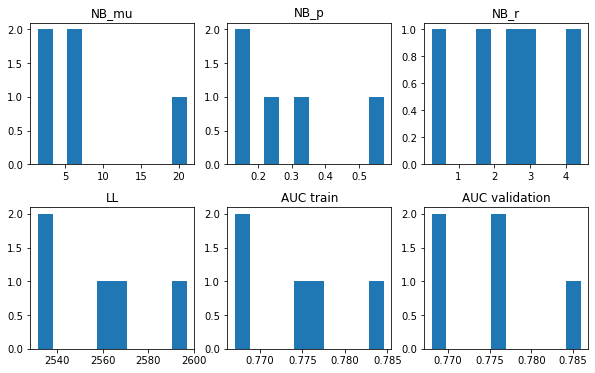

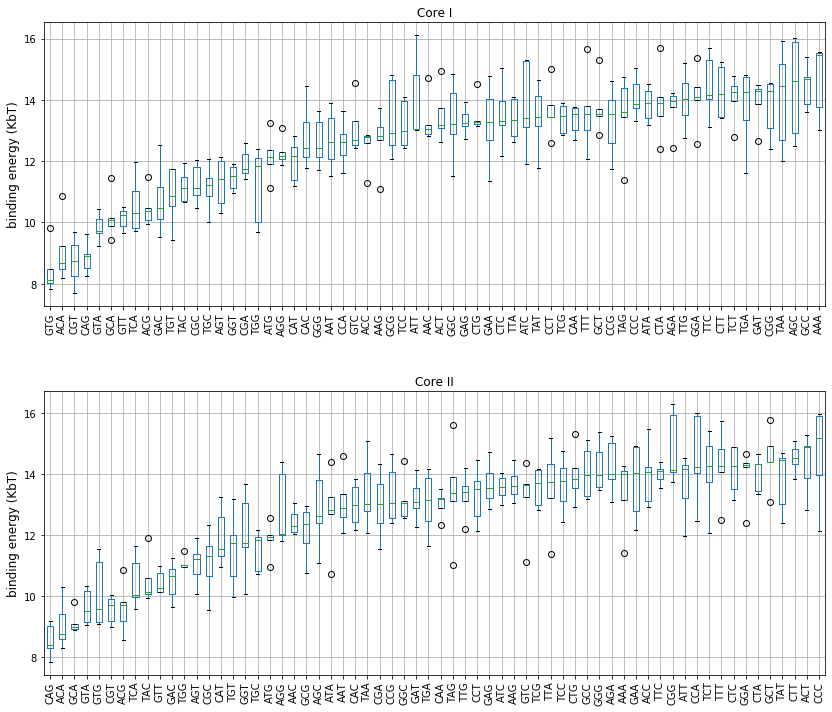

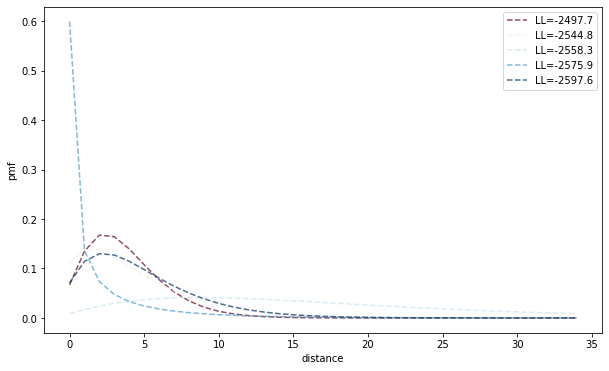

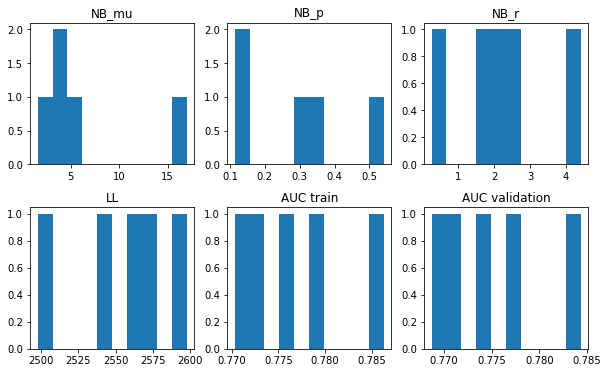

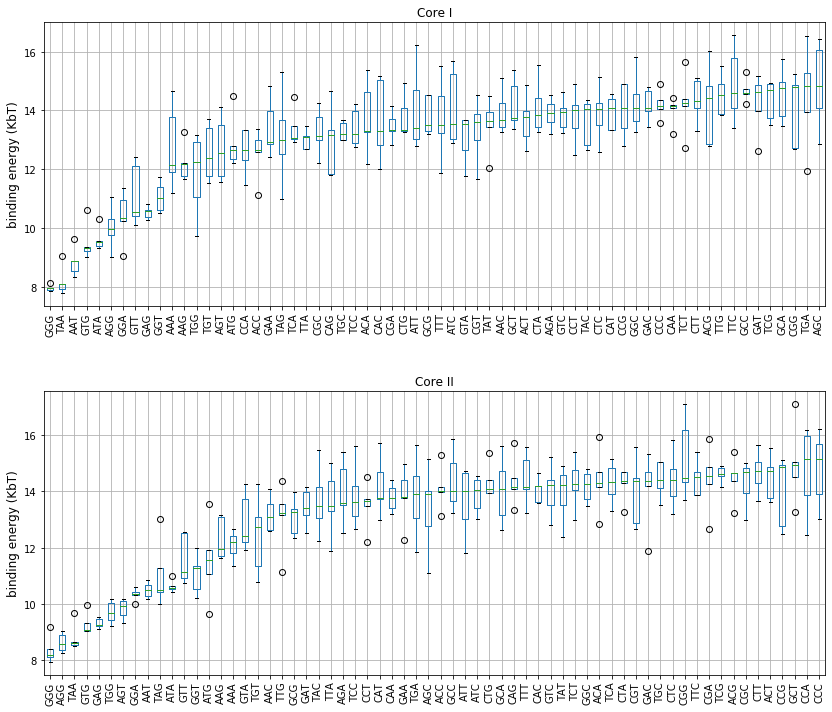

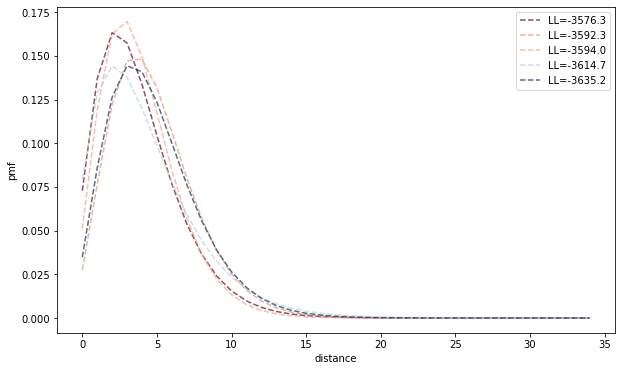

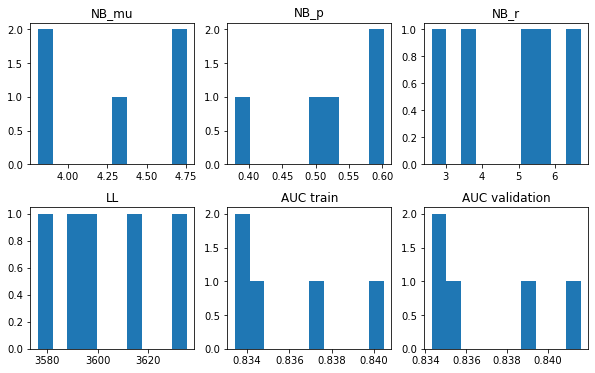

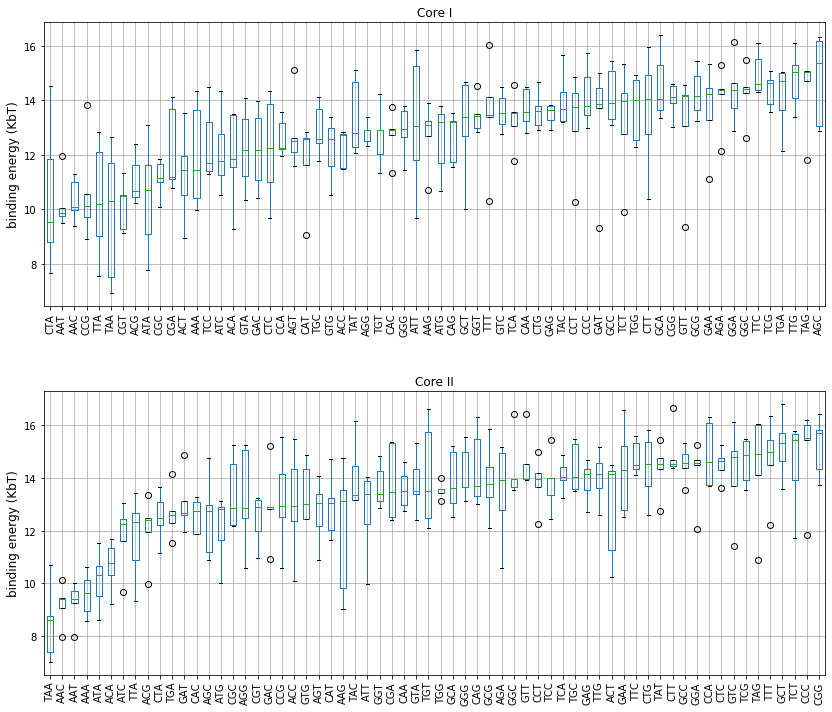

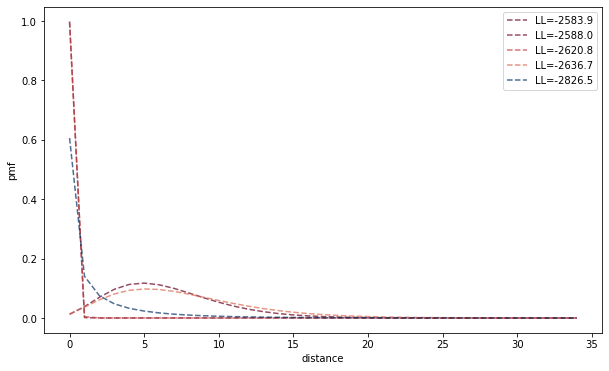

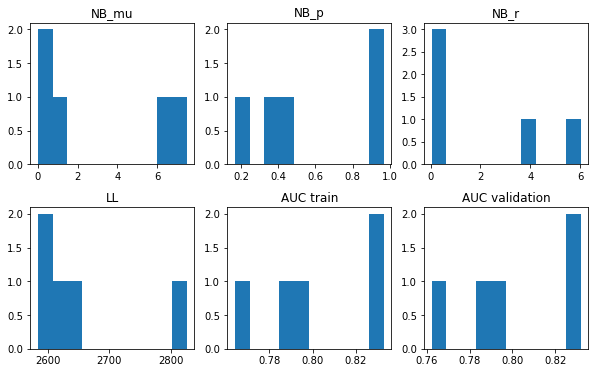

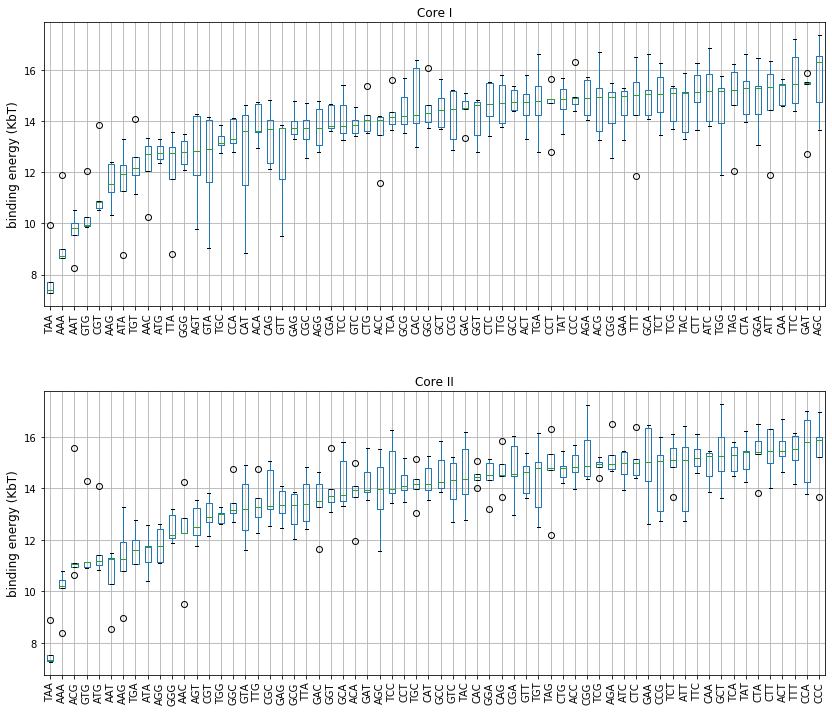

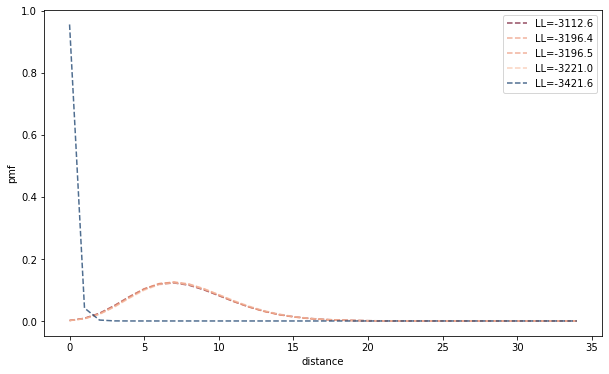

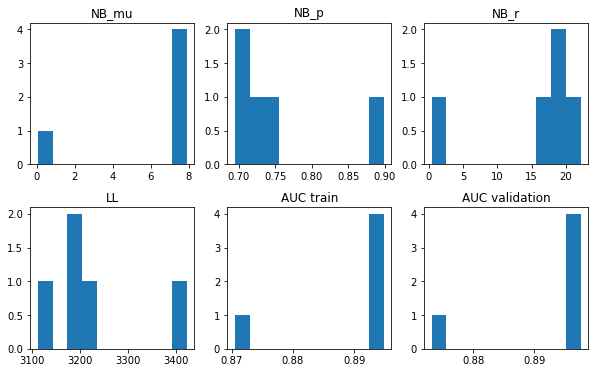

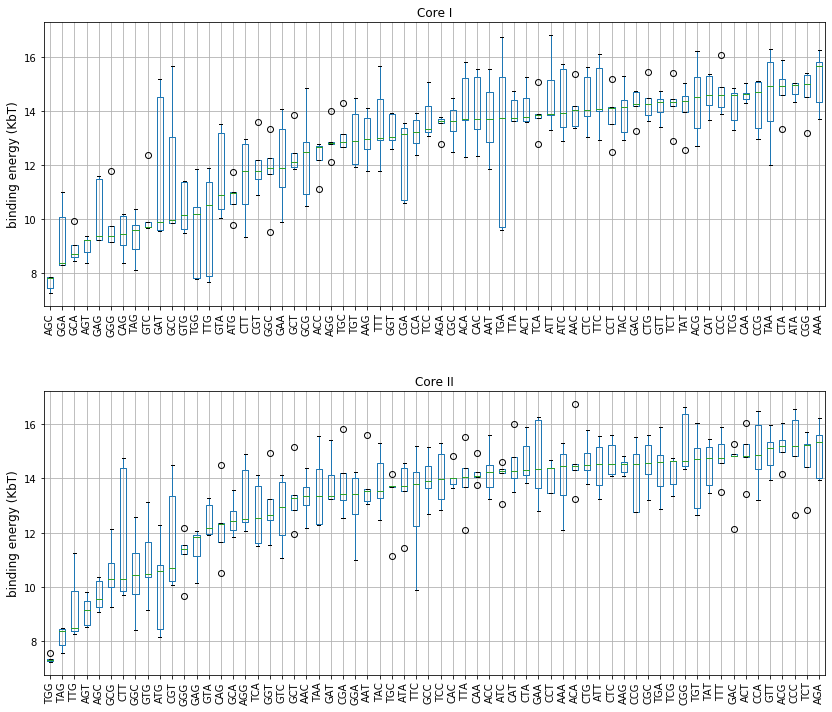

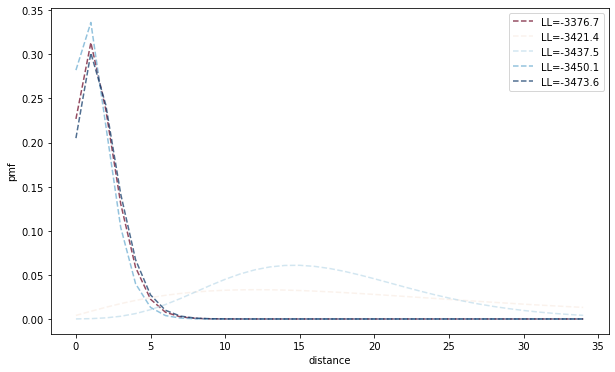

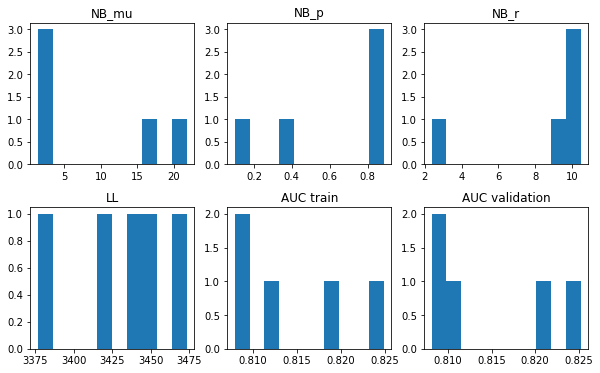

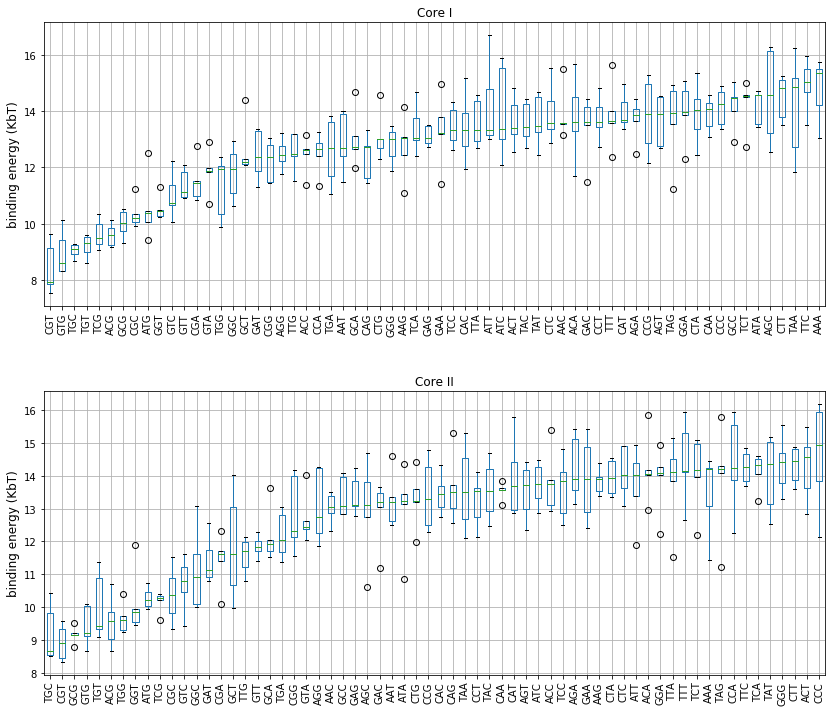

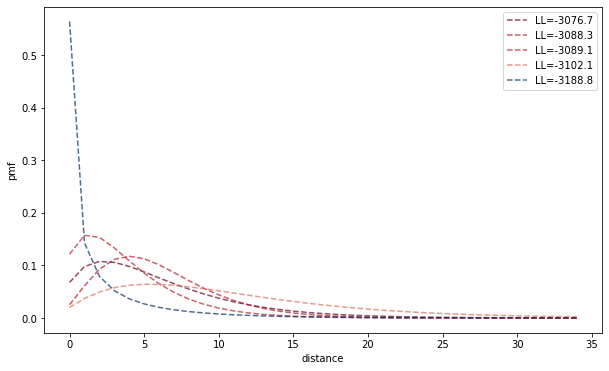

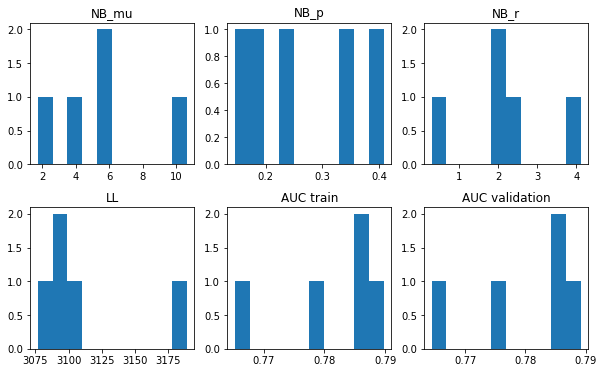

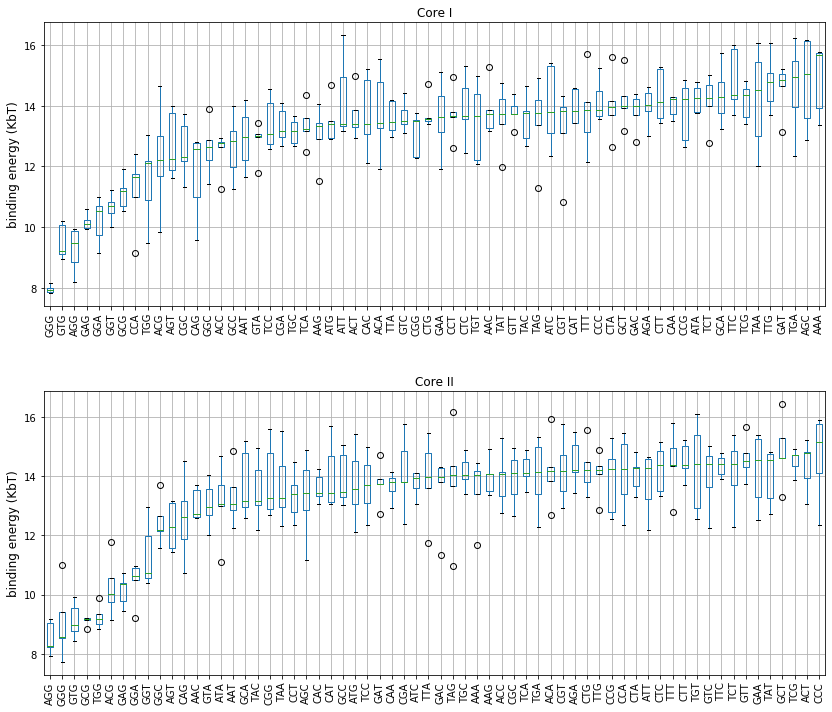

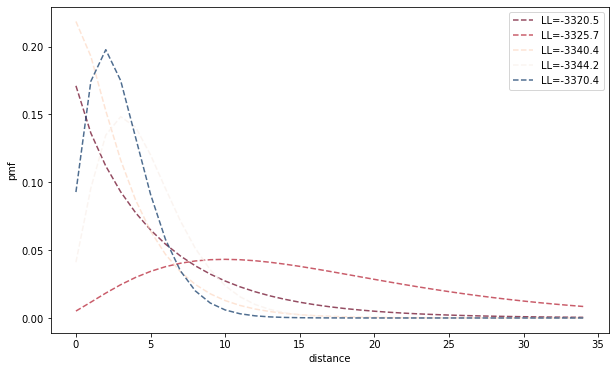

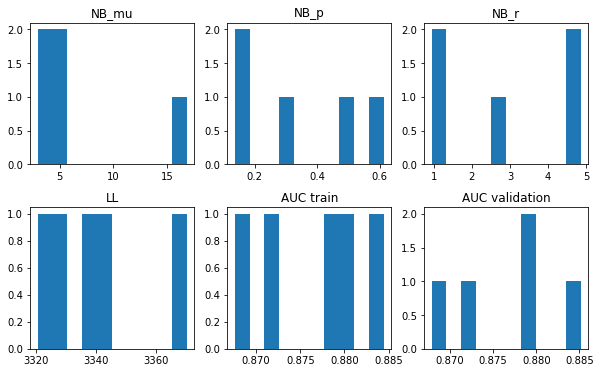

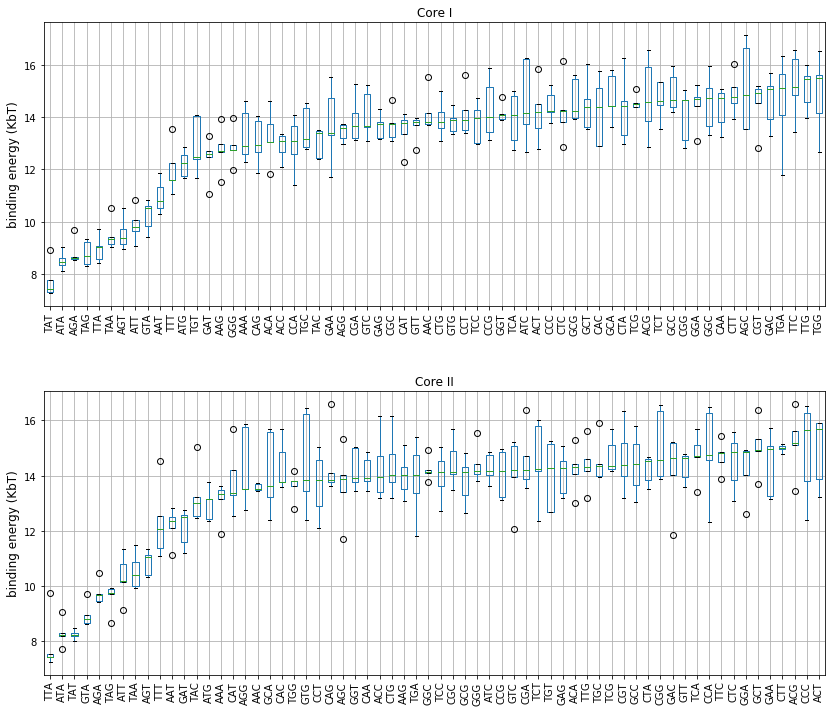

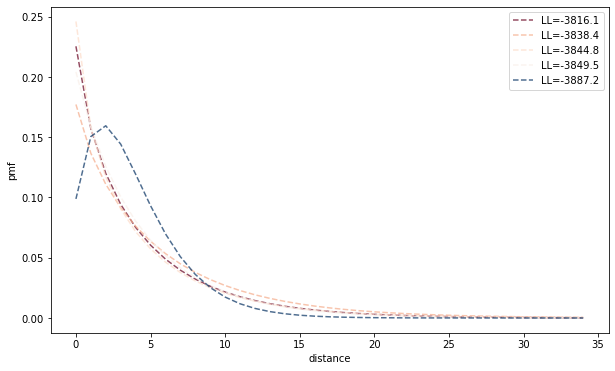

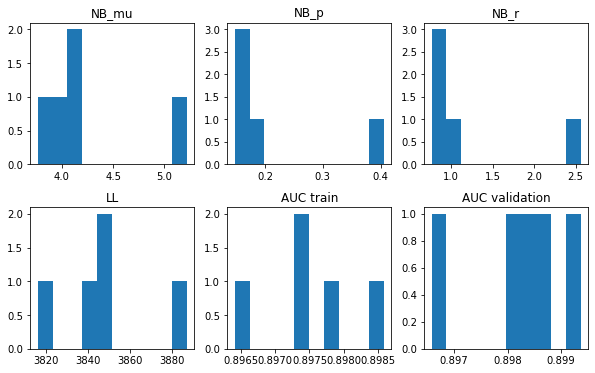

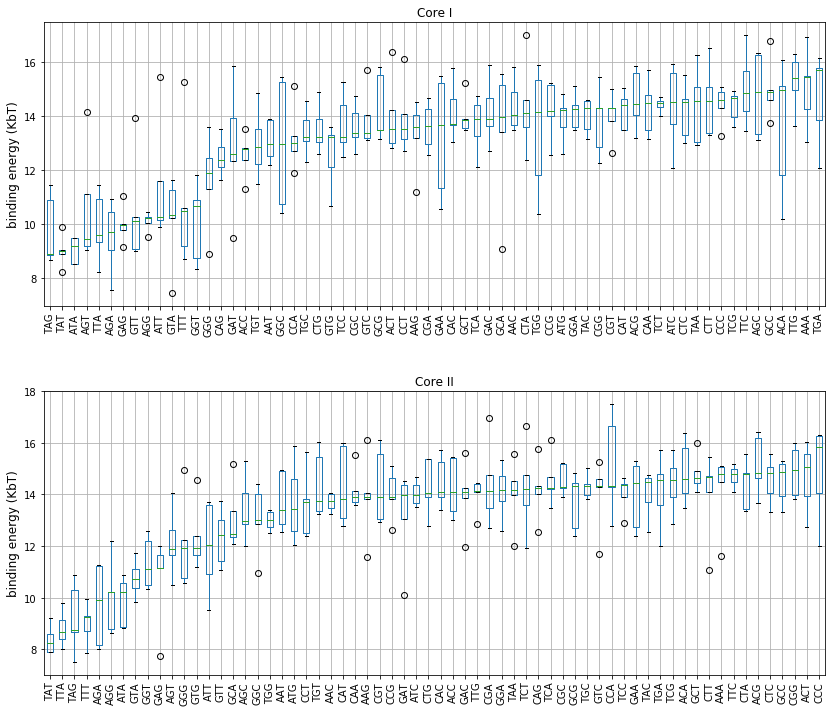

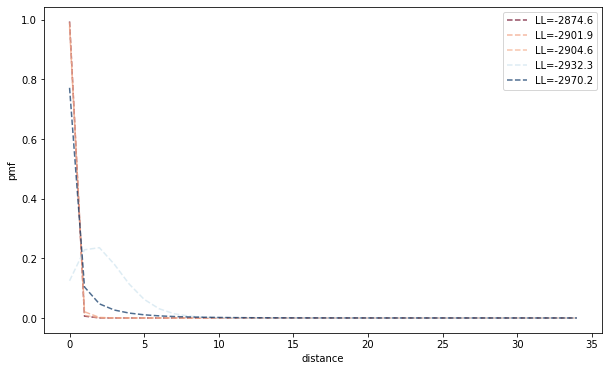

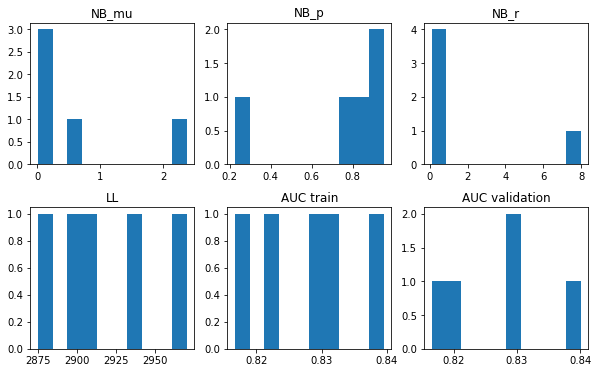

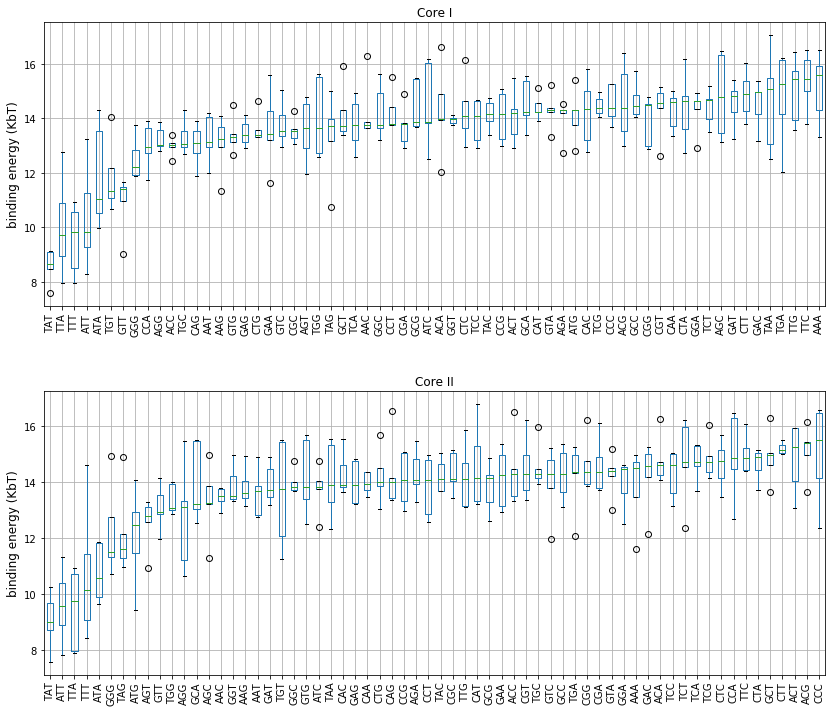

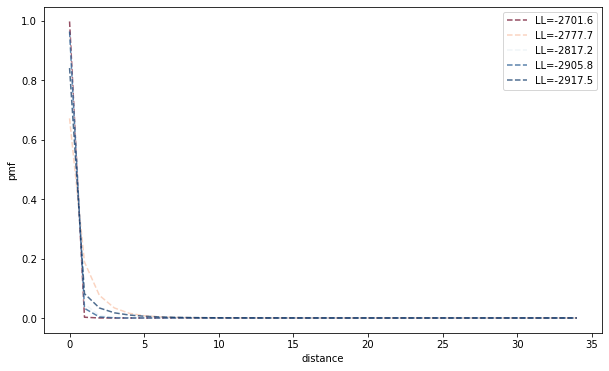

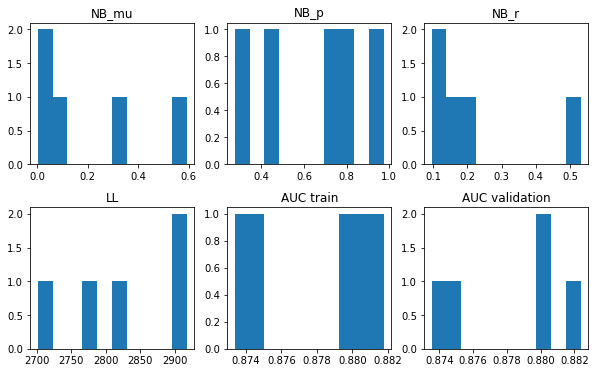

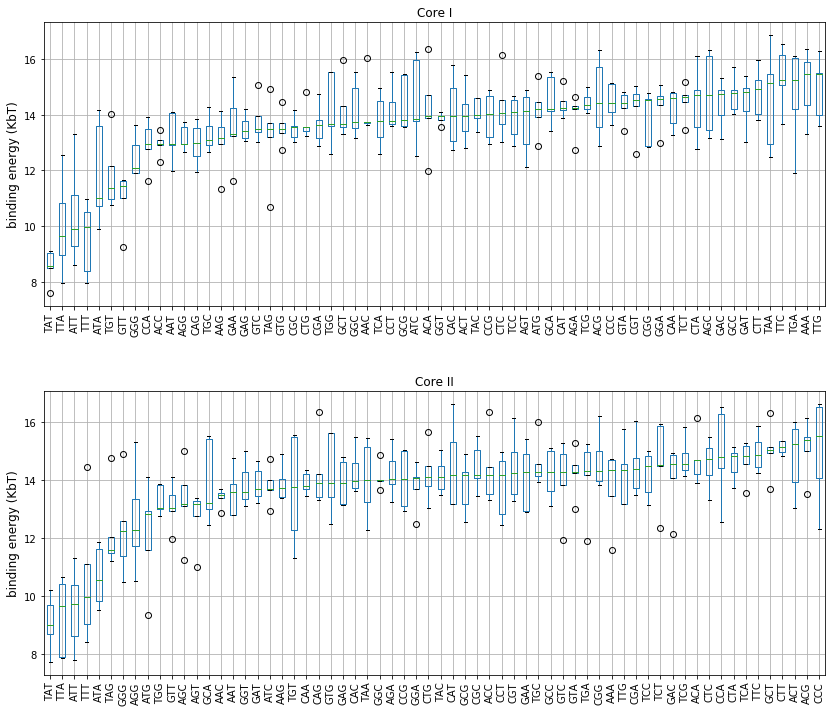

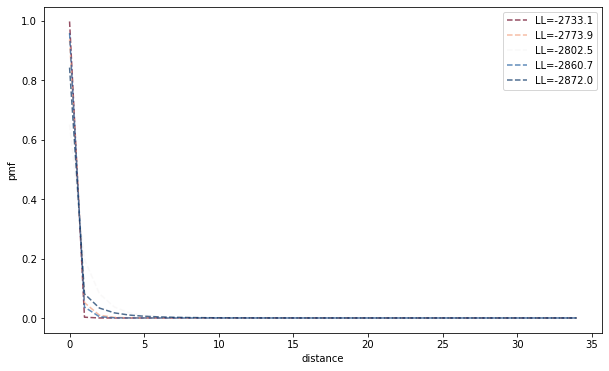

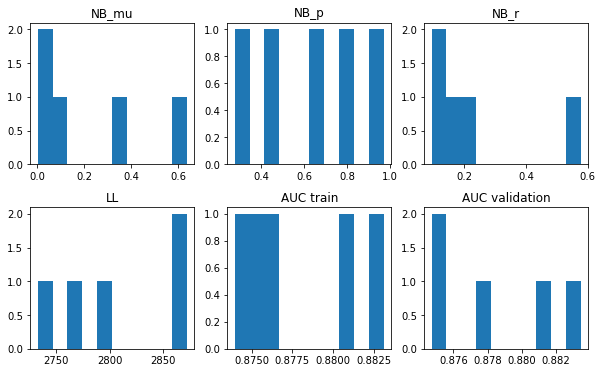

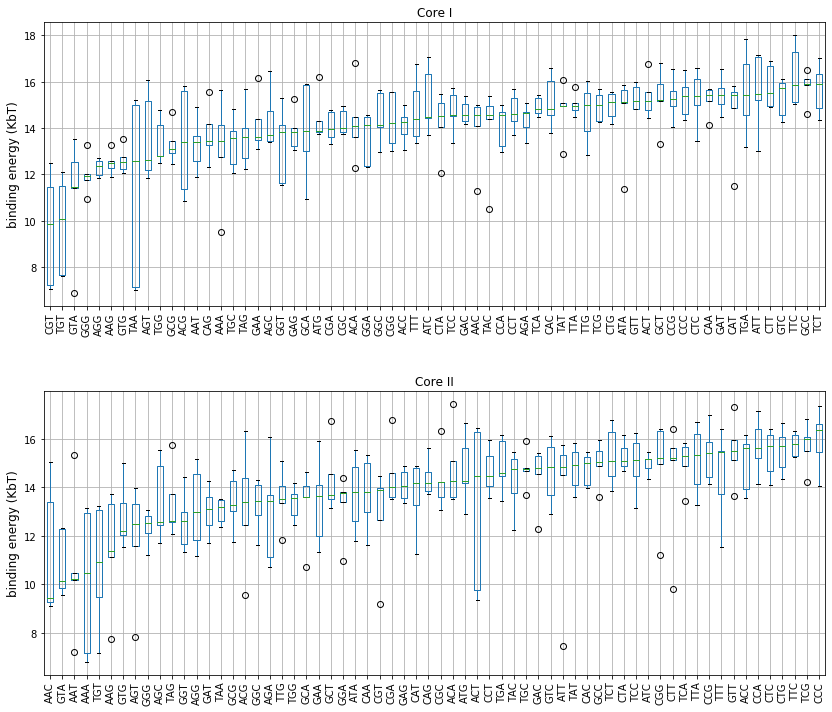

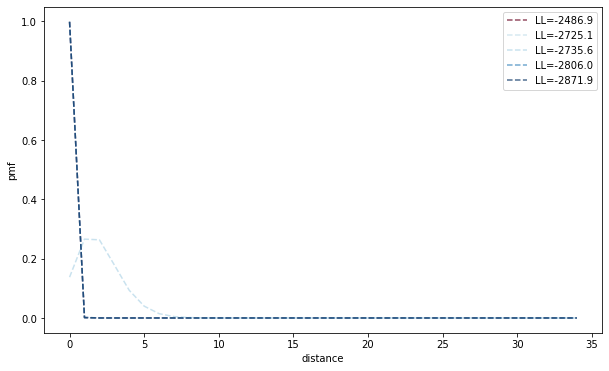

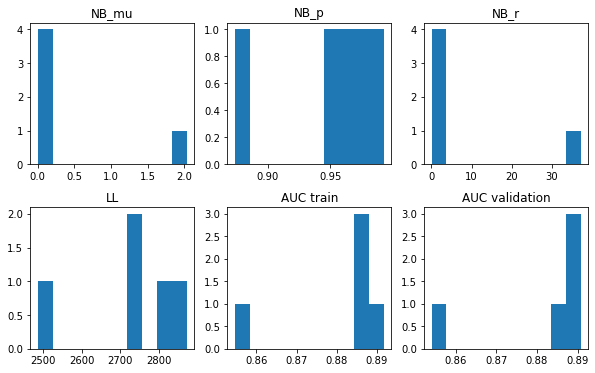

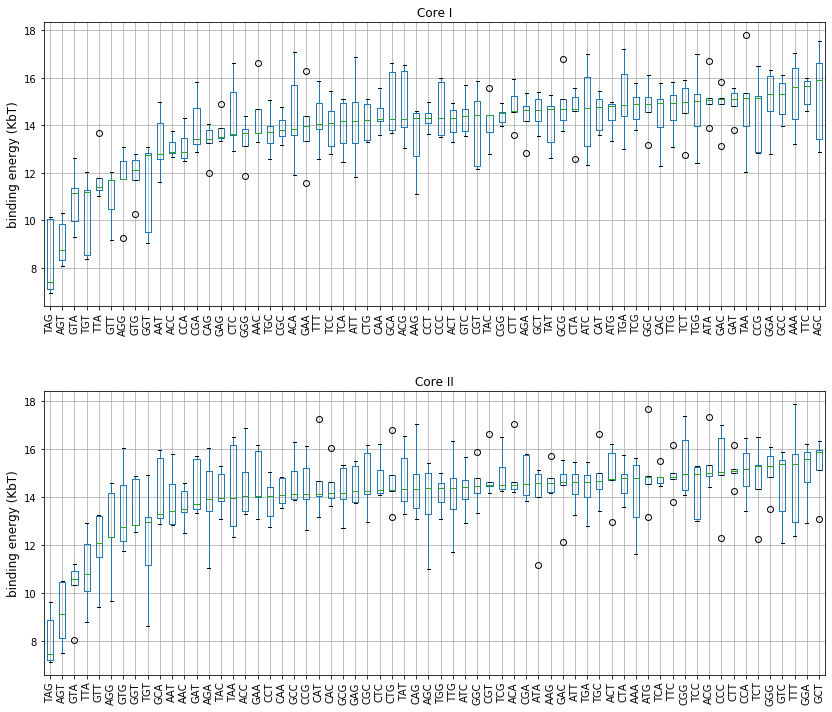

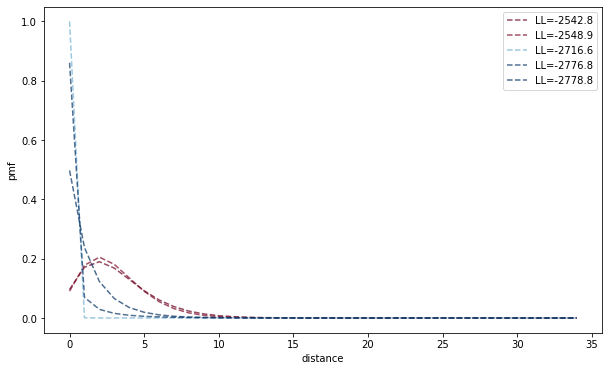

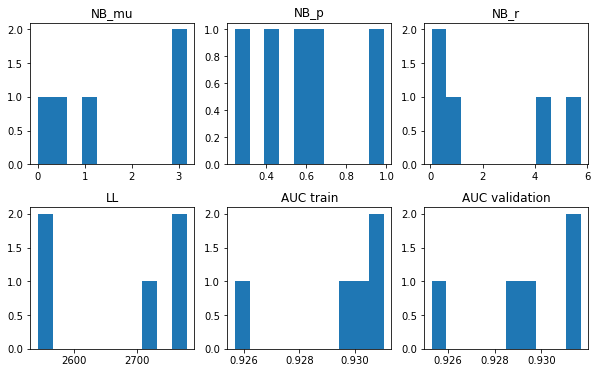

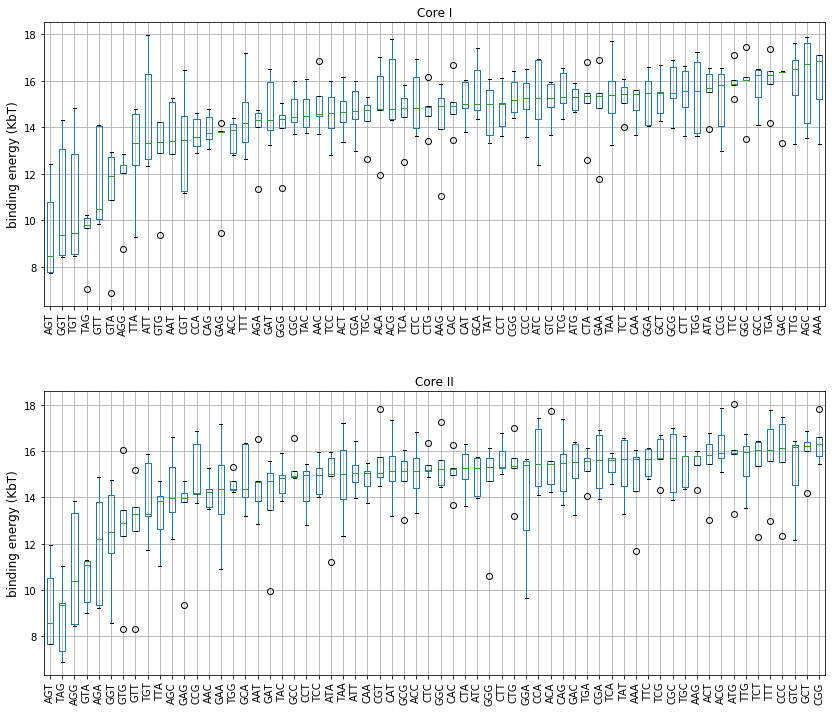

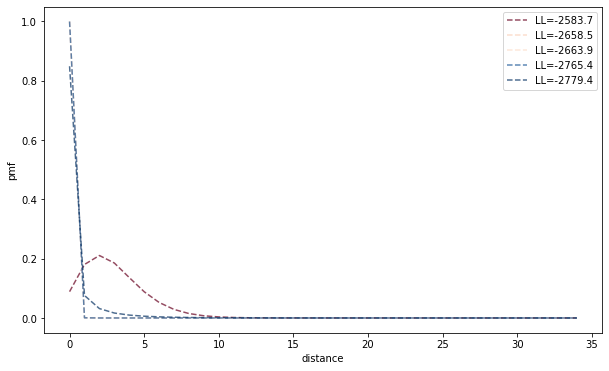

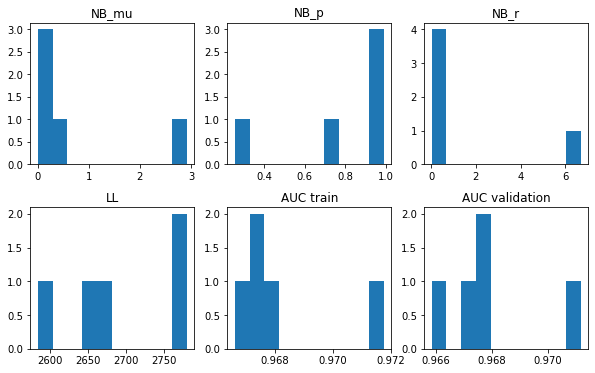

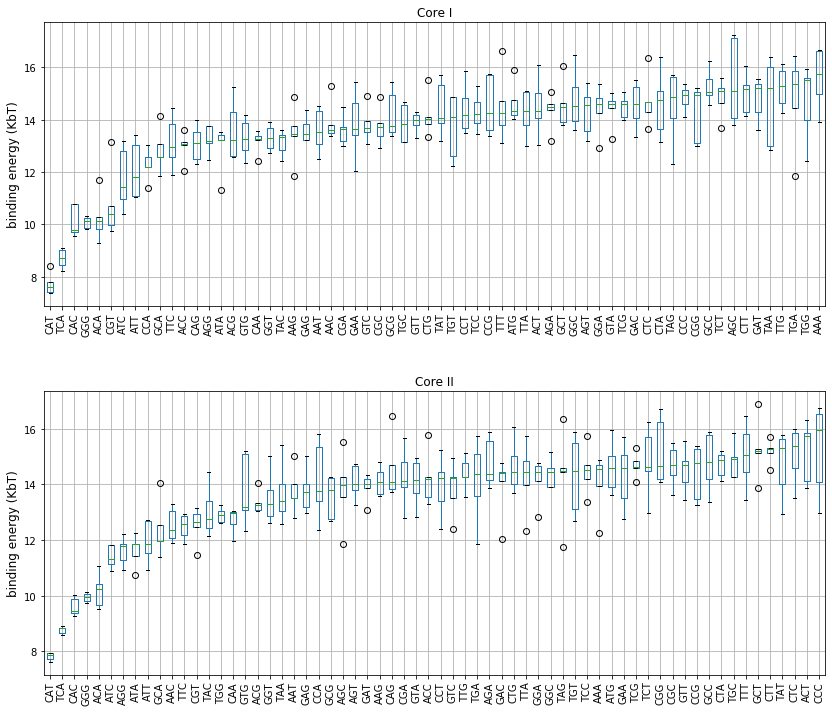

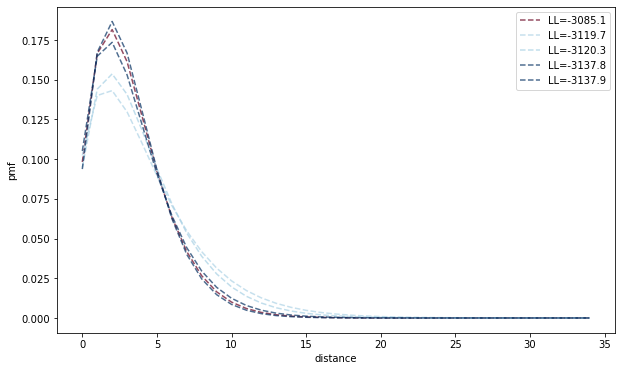

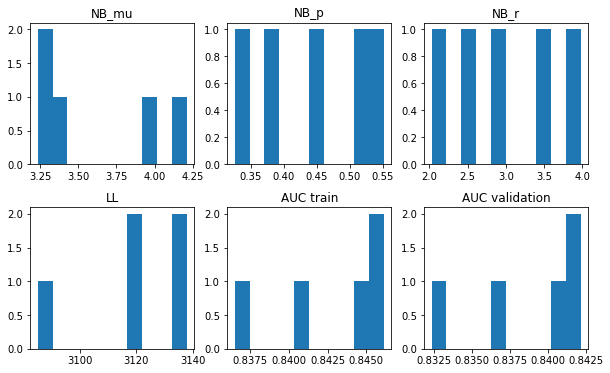

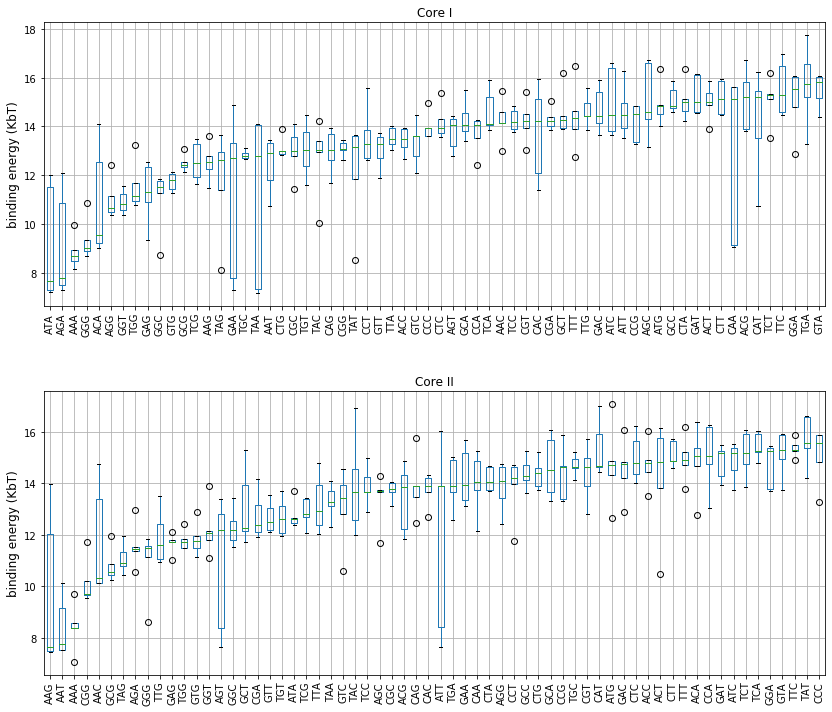

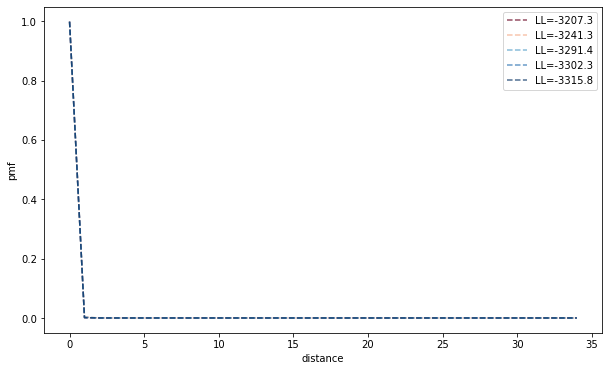

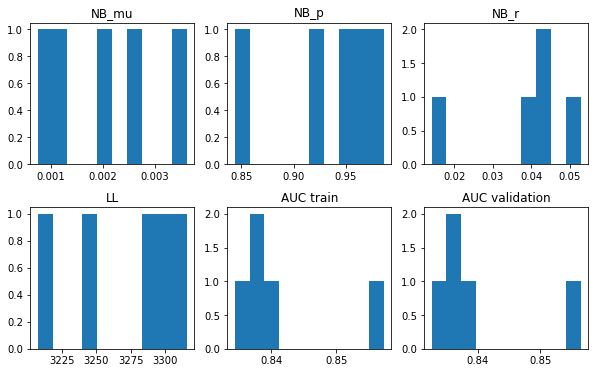

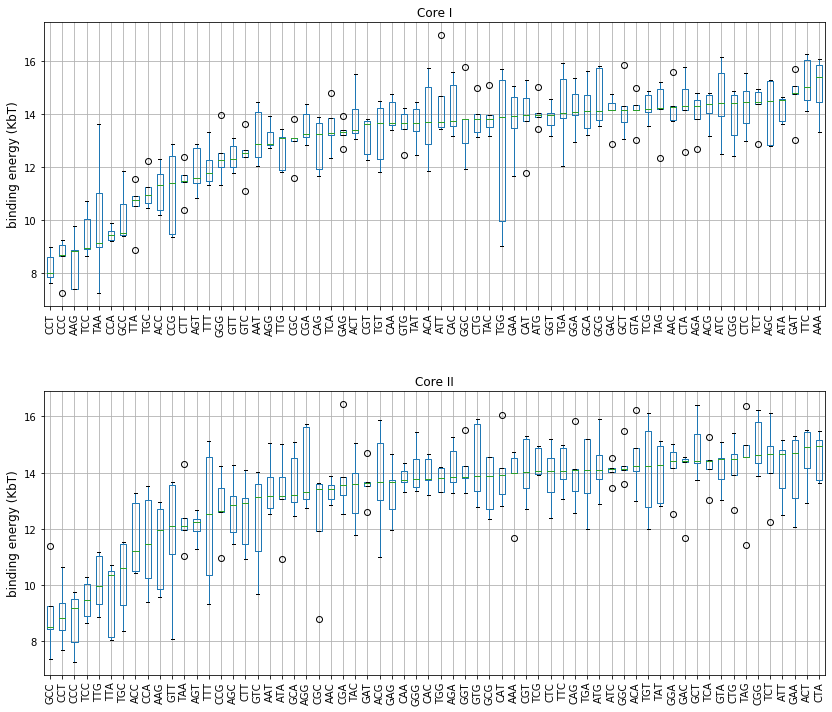

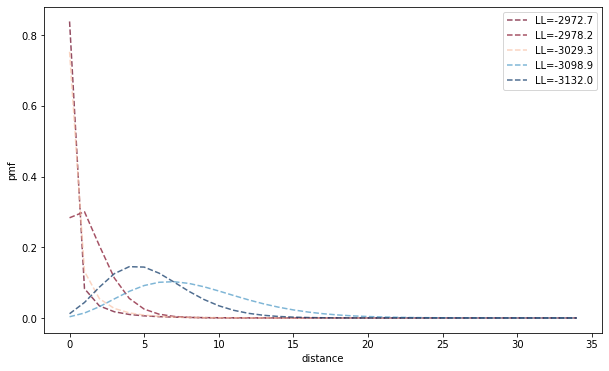

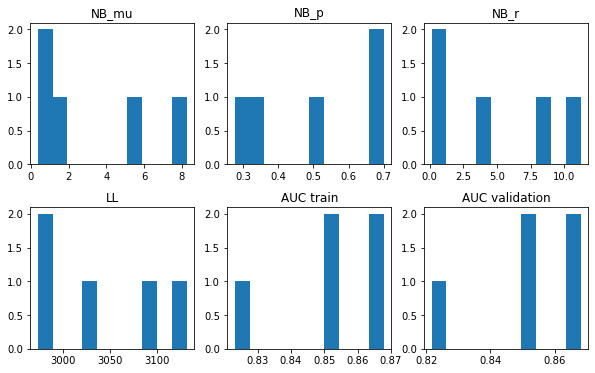

In [149]:
selex_files = np.loadtxt('selex_files.txt', dtype=str)
factors = np.unique([s.split('_')[0] for s in selex_files])
param_dir = 'param/selex/'

for i in range(48):

    keyw = f'{factors[i]}_4vs0'  #the keyword which assigns the files to a batch

    param_files = [f for f in os.listdir(param_dir) if isfile(join(param_dir, f))]

    to_pick = [s.startswith(keyw) for s in param_files]
    param_files = list(compress(param_files, to_pick))

    print('number of files: %d'%len(param_files))
    adam_params = read_params(param_files)

    #structure data as pandas DF
    colnames = [inx_kmer[i] for i in range(len(inx_kmer))] + [inx_kmer[i] for i in range(len(inx_kmer))] + ['sf', 'r', 'p'] + ['LL', 'auct', 'aucv']

    data = pd.DataFrame(adam_params, columns=colnames)
    core1 = data.iloc[:,:len(kmer_inx)]
    core1 = core1.loc[:,core1.median().sort_values().index]
    core2 = data.iloc[:,len(kmer_inx):2*len(kmer_inx)]
    core2 = core2.loc[:,core2.median().sort_values().index]

    pdf = matplotlib.backends.backend_pdf.PdfPages("plots/selex/summary_%s.pdf"%keyw)

    #=== plot motifs =================
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,12))
    plt.subplots_adjust(hspace=0.3)

    core1.boxplot(ax=ax1, rot=90)
    ax1.set_title('Core I', fontsize=12)
    ax1.set_ylabel('binding energy (KbT)', fontsize=12)

    core2.boxplot(ax=ax2, rot=90)
    ax2.set_title('Core II', fontsize=12)
    ax2.set_ylabel('binding energy (KbT)', fontsize=12)

    pdf.savefig(fig)

    #=====================

    r = data.sort_values(by='LL')['r'].values
    p = data.sort_values(by='LL')['p'].values
    ll = -data.sort_values(by='LL')['LL'].values

    #== plot distance distributions =================

    fig, ax = plt.subplots(figsize=(10,6))

    xx = np.arange(35)
    cmap = matplotlib.cm.get_cmap('RdBu_r')
    colors = (ll-min(ll))/(max(ll)-min(ll))
    colors = [cmap(c) for c in colors]

    for i in range(len(r)):
        ax.plot(xx, nbinom.pmf(xx, r[i], p[i]), alpha=0.7, color=colors[i], linestyle='--', label=f'LL={ll[i]:.1f}')

    if False:
        ax.plot(xx, nbinom.pmf(xx, n_orig, p_orig), color='red')
        ax2 = ax.twinx()
        ax2.plot(np.arange(0,len(distance_enrichment)), distance_enrichment, color='green')
    ax.legend()    
    ax.set_xlabel('distance')
    ax.set_ylabel('pmf')
    pdf.savefig(fig)

    #== plot distance attributes and energy distribution ====

    fig, axes = plt.subplots(2,3, figsize=(10,6))
    plt.subplots_adjust(hspace=0.3)

    ax1, ax2, ax3 = axes[0]

    _ = ax1.hist(((1-p)*r)/(p))
    ax1.set_title('NB_mu')

    _ = ax2.hist(p)
    ax2.set_title('NB_p')

    _ = ax3.hist(r)
    ax3.set_title('NB_r')


    ax1, ax2, ax3 = axes[1]

    _ = ax1.hist(data.loc[:,'LL'].values)
    ax1.set_title('LL')

    _ = ax2.hist(data.loc[:,'auct'].values)
    ax2.set_title('AUC train')

    _ = ax3.hist(data.loc[:,'aucv'].values)
    ax3.set_title('AUC validation')

    pdf.savefig(fig)

    plt.ioff()
    pdf.close()

2.111749851555278, 0.16757803209231475


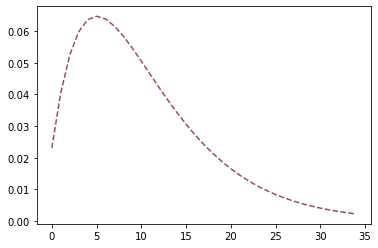

In [132]:
i=0
print(f'{r[i]}, {p[i]}')
plt.plot(xx, nbinom.pmf(xx, r[i], p[i]), alpha=0.7, color=colors[i], linestyle='--', label=f'LL={ll[i]:.1f}')

In [126]:
data

AAA        CAA        GAA        TAA        ACA        CCA  \
0   14.486800  12.977968  12.972749  11.004924  10.151580  11.668864   
1   13.784445  11.657242  12.042189  11.273792  11.260071  10.597940   
2   10.840958  13.021404  10.980511  11.264686  10.223512  11.941284   
3   12.171759  13.469815  12.442194  11.695188   9.908856  12.744716   
4   12.209525  11.987012  12.896044  10.740190  10.575381  11.430975   
5   10.851676  11.716743  11.061853  10.321033  10.042941  11.934986   
6   12.538505  12.513609  10.742140  14.403168   9.363483  10.869227   
7   11.696662  12.293677  12.736374  12.667124  11.609667  12.616866   
8   13.492943  12.302929  12.159078  12.192501   9.097015  12.524120   
9   14.410436  13.449831  14.294708  14.761772  12.431682  12.032313   
10  12.260648  13.416407  10.806510  11.457018   9.249715  13.860934   
11  12.592818  13.226825  11.671891  13.153278  10.399482  11.198357   
12  12.274292  13.479841  12.712854  11.456101  10.158207  10.805504   
13  12.506411  11.083601  12.237406  12.309747   9.984192  11.815908   
14  14.204631  12.249474  12.725269  12.724991  10.018980  12.143028   
15  12.734164  14.964093  12.501073  12.490341  11.055101  12.940171   
16  12.527270  12.061878  12.150433  12.084334   9.983696  11.735080   
17  12.611522  10.481630  12.553480  13.298036  11.356794  14.178449   
18  10.711906  12.514260  11.005536  11.197204  10.163770  11.172293   
19  12.703337  12.208501  14.555186  12.140868  12.256346  13.105571   

          GCA        TCA        AGA        CGA  ...        ATT        CTT  \
0   11.483256  10.773340  12.304992  12.627669  ...  11.066656  11.950411   
1   13.238919  11.006795  12.639276  12.450524  ...  10.308761  13.358437   
2   10.402051  10.578134  10.931718  13.531692  ...  13.420004  13.194846   
3   11.787950  10.356628  13.796431  12.525093  ...  11.056068  11.850964   
4   10.602038  11.165946  11.156086  16.219801  ...  10.736884  12.790121   
5    9.973845  10.419387  10.589138  12.372360  ...  12.275301  12.756208   
6   11.212426  10.040872  11.756323  11.958505  ...  12.069221  13.078270   
7   12.457757  12.263230  13.879471  12.007296  ...  10.711816  11.775384   
8    9.881945  11.472615  11.862547  13.727207  ...  10.210506  11.418928   
9   10.897267  10.788823  12.700348  14.065151  ...  10.837993  12.286188   
10  11.619216  12.096861  12.696770  14.146770  ...  11.504071  12.654629   
11  10.211953  11.631222  13.097330  11.935498  ...  11.646927  12.599215   
12  10.060135  11.708596  12.405205  12.602866  ...  11.047205  12.290451   
13  10.407962  12.108538  11.877714  13.065037  ...  11.881957  11.506750   
14  10.729454  10.146744  13.749881  13.623787  ...  11.503301  13.325022   
15  11.668624  11.709497  12.185768  12.174672  ...  11.426655  12.185543   
16  11.928540  12.131172  12.811769  11.397983  ...  11.404122  10.936873   
17  11.214492  10.977349  11.950548  12.227414  ...  12.670985  12.334773   
18  10.086942  10.405092  10.903475  12.833575  ...  11.673088  13.616199   
19  10.614146  10.632634  12.576772  12.450595  ...  10.481437  11.587429   

          GTT        TTT            sf          r         p           LL  \
0   12.702608  11.059036  1.408947e+04   3.712604  0.145429  3409.970668   
1   13.853282  11.876285  8.695606e+03   5.859159  0.158727  3403.516742   
2   14.532546  12.165358  3.859066e+06  19.862911  0.344071  3365.561175   
3   11.272870  10.938927  5.847943e+03   4.222458  0.447070  3407.121424   
4   12.250799  10.185854  2.500781e+05   4.947918  0.164396  3394.137371   
5   13.196777  11.658731  2.513504e+06  17.690058  0.327920  3384.456592   
6   13.141506  10.356550  6.163991e+03   2.553426  0.016656  3405.981236   
7   13.267684  10.991924  1.088443e+04   5.067138  0.217759  3408.270938   
8   12.629280  11.826690  1.199155e+04   7.028329  0.240719  3402.707749   
9   12.598782  13.727331  3.428991e+03   1.045587  0.756406  3403.951601   
10  12.593142  10.204298  2.644653e+05   5.

In [102]:
nbinom.pmf(xx, r[0], p[0])

array([1.65086255e-14, 3.95768538e-13, 4.83214181e-12, 4.00497891e-11,
       2.53417136e-10, 1.30539218e-09, 5.70051473e-09, 2.17002138e-08,
       7.34893171e-08, 2.24862276e-07, 6.29248942e-07, 1.62628466e-06,
       3.91323776e-06, 8.82601227e-06, 1.87654312e-05, 3.77957028e-05,
       7.24196091e-05, 1.32497545e-04, 2.32227473e-04, 3.91047325e-04,
       6.34271871e-04, 9.93246719e-04, 1.50480613e-03, 2.20986782e-03,
       3.15108801e-03, 4.36962597e-03, 5.90121128e-03, 7.77184647e-03,
       9.99358608e-03, 1.25608889e-02, 1.54480287e-02, 1.86079660e-02,
       2.19729411e-02, 2.54568616e-02, 2.89593559e-02])

In [ ]:
from scipy.stats import nbinom
xx = np.arange(35)
n_orig = 5
p_orig = 0.5
cmap = matplotlib.cm.get_cmap('RdBu_r')
colors = (ll-min(ll))/(max(ll)-min(ll))
colors = [cmap(c) for c in colors]

for i in range(len(r)):
    plt.plot(xx, nbinom.pmf(xx, r[i], p[i]), alpha=0.7, color=colors[i])
    #print()
    
plt.plot(xx, nbinom.pmf(xx, n_orig, p_orig), color='red')

10.0
9.999999999999996


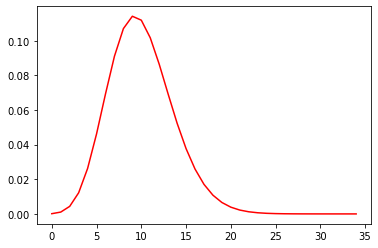

In [36]:
n_orig = 40
p_orig = 0.8
print(nbinom.mean(n_orig, p_orig))
print(n_orig*(1-p_orig)/p_orig)
plt.plot(xx, nbinom.pmf(xx, n_orig, p_orig), color='red')

In [45]:
(ll-min(ll))/(max(ll)-min(ll))

array([1.        , 0.69592724, 0.51690732, 0.46937363, 0.45968149,
       0.44397411, 0.42187948, 0.42028744, 0.36143692, 0.32077974,
       0.27334874, 0.22406524, 0.22385063, 0.19401256, 0.14156274,
       0.12740504, 0.        ])

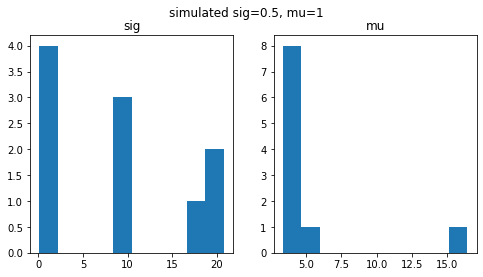

In [188]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
_ = ax1.hist(sig)
ax1.set_title('sig')
_ = ax2.hist(x)
ax2.set_title('mu')
_ = fig.suptitle('simulated sig=0.5, mu=1')

In [131]:
int(round(np.exp(-2)))

0

In [154]:
x[0] = 2
x[1] = 2.12

sig[0]=0.3
sig[1]=0.25

In [195]:
sig

array([ 0.14299307,  0.16503288,  0.14800646,  0.16007239,  0.15738035,
       11.69689073, 17.55397493,  9.37541579,  9.4874156 ])

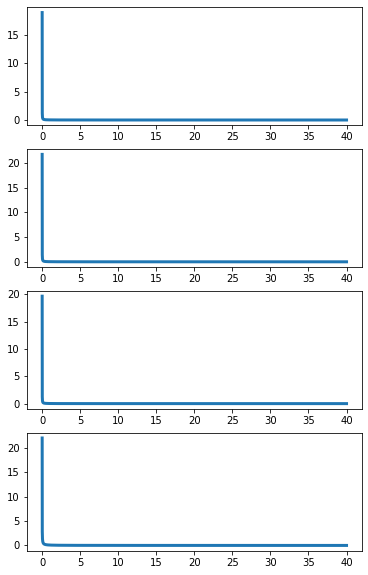

In [174]:
fig, axes = plt.subplots(4,1, figsize=(6,10))
for i in range(4):
    val = np.linspace(0.001, 40, 20000)
    mu = x[i]
    sigma = sig[i]
    pdf = np.exp(-(np.log(val) - mu)**2 / (2 * sigma**2))/ (val * sigma * np.sqrt(2 * np.pi))
    #print(np.trapz(pdf, val))
    axes[i].plot(val, pdf,lw=3)

(array([1., 2., 0., 0., 2., 0., 2., 0., 1., 1.]),
 array([0.33381558, 0.33679045, 0.33976532, 0.34274018, 0.34571505,
        0.34868992, 0.35166479, 0.35463966, 0.35761453, 0.3605894 ,
        0.36356427]),
 <a list of 10 Patch objects>)

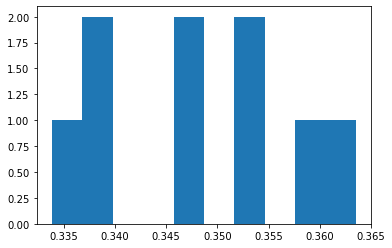

In [121]:
plt.hist(sig)

(array([1., 0., 0., 1., 2., 1., 1., 1., 0., 2.]),
 array([1.26948565, 1.27763729, 1.28578893, 1.29394058, 1.30209222,
        1.31024386, 1.3183955 , 1.32654714, 1.33469878, 1.34285042,
        1.35100207]),
 <a list of 10 Patch objects>)

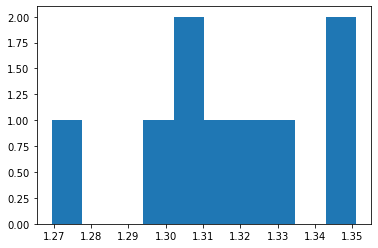

In [122]:
plt.hist(x)

In [196]:
pd.DataFrame({'a':[1,2,3],'b':[1,2,[1,2,3]]})

a          b
0  1          1
1  2          2
2  3  [1, 2, 3]